<a href="https://colab.research.google.com/github/hatkaran/Face_Detection/blob/main/Face_Detection_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pre-processing

In [116]:
!pip3 install mtcnn

In [117]:
!pip3 install --user tensorflow

In [118]:
import os
import zipfile
import random
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from mtcnn.mtcnn import MTCNN
import seaborn as sns

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
local_zip = "/content/drive/MyDrive/Data of face recog./DataImg.zip"
zip_ref = zipfile.ZipFile(local_zip,"r")
zip_ref.extractall(r"/content/drive/MyDrive/Data of face recog./DataImg")
zip_ref.close()

In [121]:
data_dir= Path(r"/content/drive/MyDrive/Data of face recog./DataImg")
list_people = os.listdir(data_dir)
folder_count = len(list_people)

In [122]:
os.listdir(data_dir)

['Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abba_Eban',
 'Abbas_Kiarostami',
 'Abdel_Aziz_Al-Hakim',
 'Abdel_Madi_Shabneh',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Rahman',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Nasseef',
 'Abdullatif_Sener',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abner_Martinez',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Rich',
 'Adam_Sandler',
 'Adam_Scott',
 'Adel_Al-Jubeir',
 'Adelina_Avila',
 'Adisai_Bodharamik',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adoor_Gopalakarishnan',
 'Adrian_Annus',
 'Adrian_Fernandez',
 'Adrian_McPherson',
 'Adrian_Murrell',
 'Adrian_Nastase',
 'Adriana_Lima',
 'Adriana_Perez_Navarro',
 'Adrianna_Zuzic',
 'Adrien_Brody',
 'Afton_S

In [ ]:
len(list_people)

331

In [ ]:
def get_image_pairs(data_dir):
    IMAGE_A = []
    IMAGE_B = []
    labels = []

    for i in range(folder_count):
        person_dir = list_people[i]
        image_list = [item for item in os.listdir(data_dir / person_dir) if not item.startswith('.')]
        image_count = len(image_list)

        for j in range(image_count):
            ind1 = np.random.randint(image_count)
            ind2 = np.random.randint(image_count)
            path_1 = image_list[ind1]
            path_2 = image_list[ind2]

            IMAGE_A.append(data_dir / person_dir / path_1)
            IMAGE_B.append(data_dir / person_dir / path_2)
            labels.append(1)






    neg = len(IMAGE_A)

    for i in range(neg):
        ind1 = np.random.randint(folder_count)
        ind2 = np.random.randint(folder_count)

        if ind1 != ind2:
            person_dir_1 = list_people[ind1]
            person_dir_2 = list_people[ind2]

            person_path_1 = data_dir / person_dir_1
            person_path_2 = data_dir / person_dir_2

            image_list_1 = [item for item in os.listdir(person_path_1) if not item.startswith('.')]
            image_list_2 = [item for item in os.listdir(person_path_2) if not item.startswith('.')]

            count1 = len(image_list_1)
            count2 = len(image_list_2)
            image_ind_1 = np.random.randint(count1)
            image_ind_2 = np.random.randint(count2)

            IMAGE_A.append(person_path_1 / image_list_1[image_ind_1])
            IMAGE_B.append(person_path_2 / image_list_2[image_ind_2])
            labels.append(0)

    labels = np.array(labels)
    return IMAGE_A, IMAGE_B, labels


In [ ]:
IMAGE_A,IMAGE_B,labels = get_image_pairs(data_dir)

In [ ]:
dataset = pd.DataFrame({'IMAGE_A': IMAGE_A[:], 'IMAGE_B': IMAGE_B[:], 'LABEL':labels[:]})
dataset = dataset.sample(frac=1)
dataset.reset_index(inplace = True)
dataset.head()

index                                            IMAGE_A  \
0    585  /content/drive/MyDrive/Data of face recog./Dat...   
1    305  /content/drive/MyDrive/Data of face recog./Dat...   
2   1261  /content/drive/MyDrive/Data of face recog./Dat...   
3    168  /content/drive/MyDrive/Data of face recog./Dat...   
4    686  /content/drive/MyDrive/Data of face recog./Dat...   

                                             IMAGE_B  LABEL  
0  /content/drive/MyDrive/Data of face recog./Dat...      1  
1  /content/drive/MyDrive/Data of face recog./Dat...      1  
2  /content/drive/MyDrive/Data of face recog./Dat...      0  
3  /content/drive/MyDrive/Data of face recog./Dat...      1  
4  /content/drive/MyDrive/Data of face recog./Dat...      1

1    855
0    851
Name: LABEL, dtype: int64


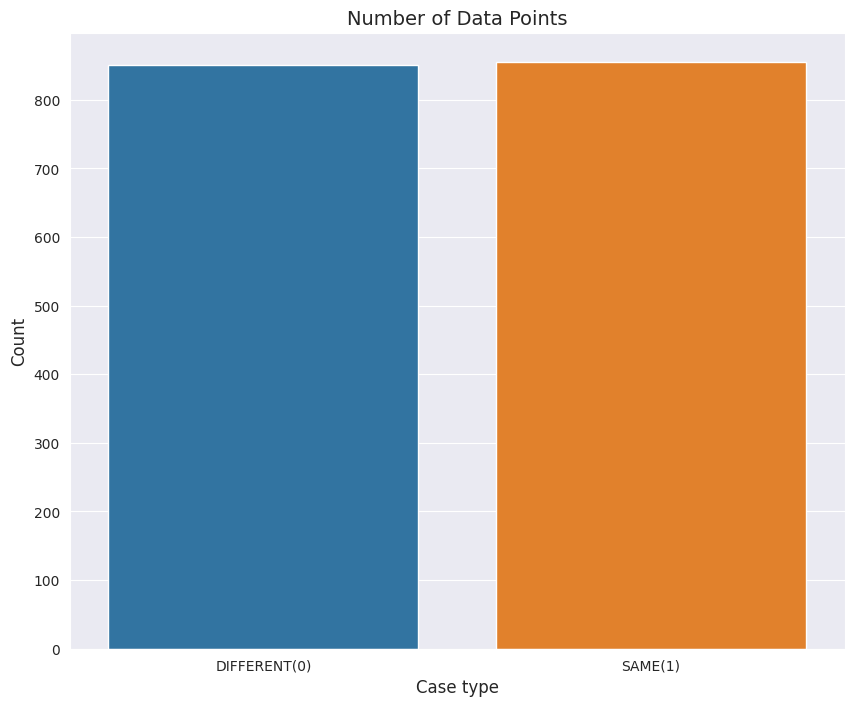

In [ ]:
##THE DATA IS PERFECTLY BALANCED
cases_count = dataset['LABEL'].value_counts()
print(cases_count)

plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of Data Points', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['DIFFERENT(0)', 'SAME(1)'])
plt.show()

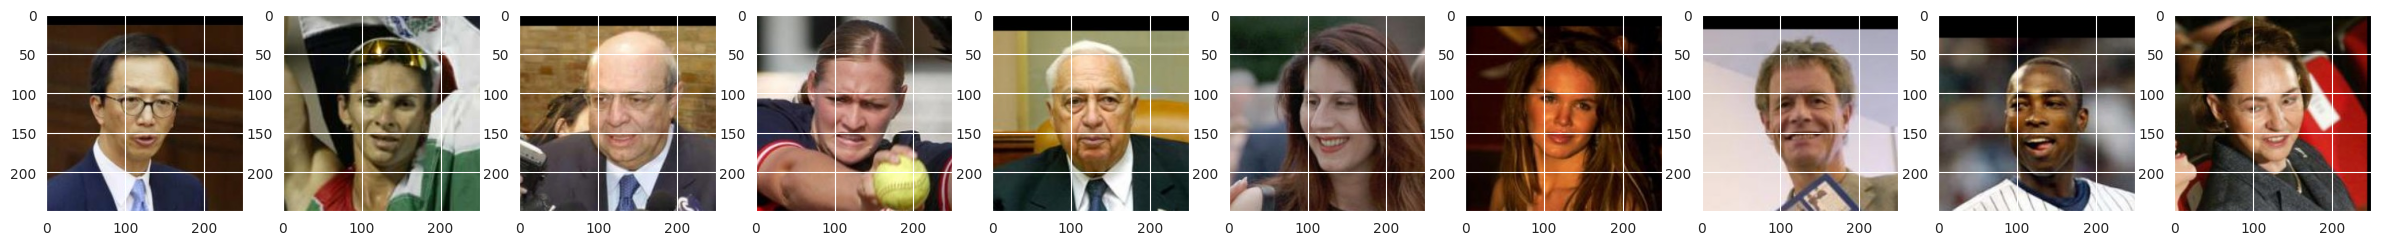

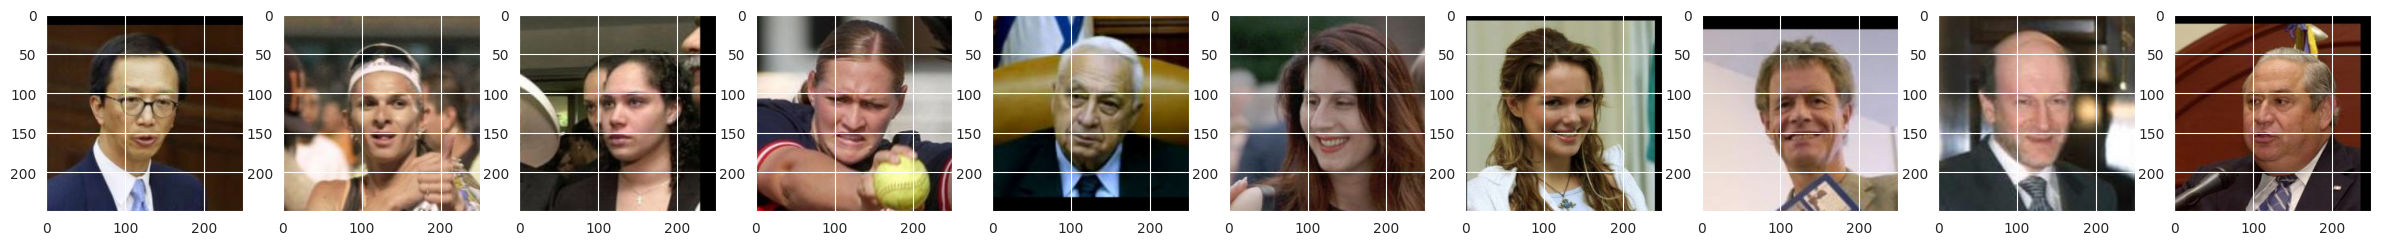

In [ ]:
#VISUALIZING THE DATASET
f, ax = plt.subplots(1,10, figsize=(30,10))
for i in range(10):
  img = cv2.imread(str(dataset['IMAGE_B'][i]))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  ax[i].imshow(img)
f, ax = plt.subplots(1,10, figsize=(30,10))
for i in range(10):
  img = cv2.imread(str(dataset['IMAGE_A'][i]))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  ax[i].imshow(img)

In [ ]:
detector  = MTCNN()

1/1 [==============================] - 0s 73ms/step


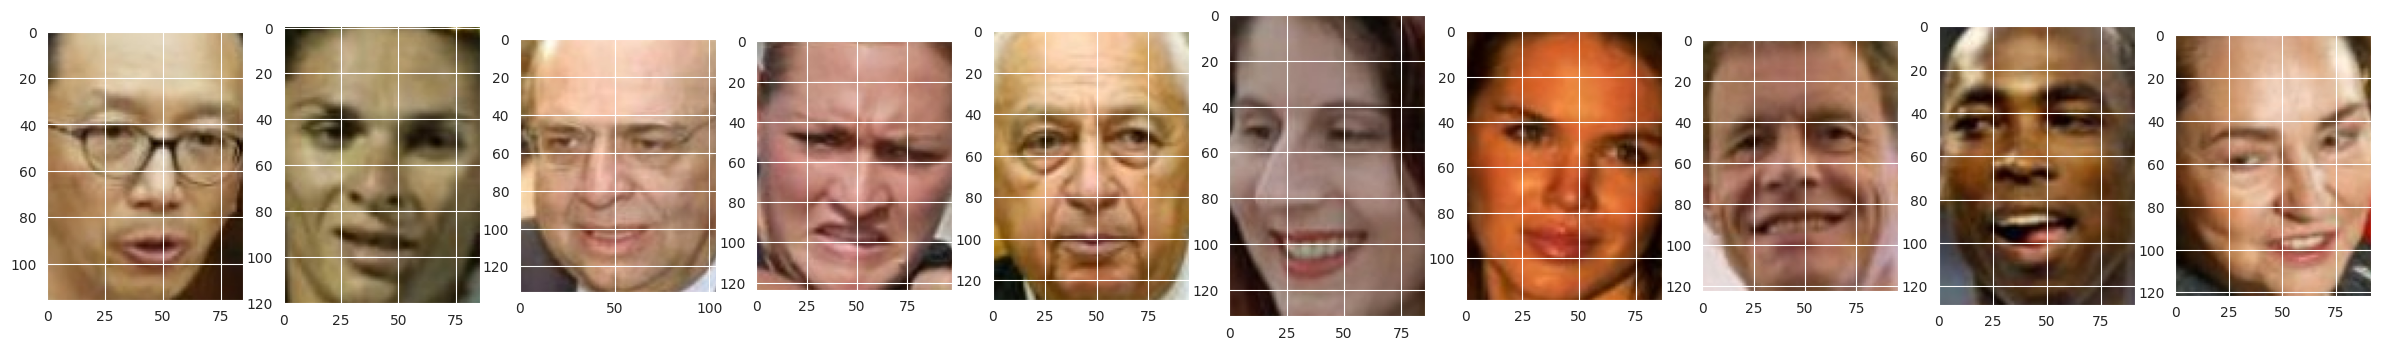

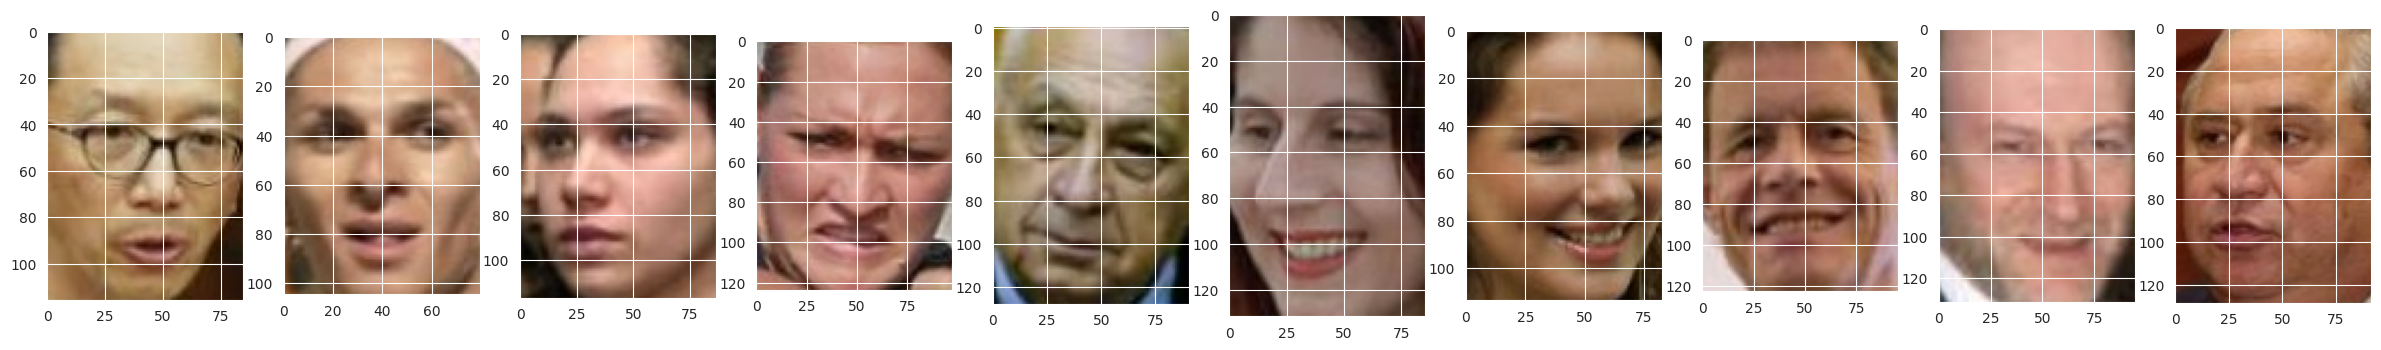

In [ ]:
#EXTRACTING FACES
f, ax = plt.subplots(1,10, figsize=(30,10))
for i in range(10):
  img = cv2.imread(str(dataset['IMAGE_B'][i]))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  face_locations = detector.detect_faces(img)
  x,y,w,h = face_locations[0]['box']
  face = img[y:y+h, x:x+w]
  ax[i].imshow(face)
f, ax = plt.subplots(1,10, figsize=(30,10))
for i in range(10):
  img = cv2.imread(str(dataset['IMAGE_A'][i]))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  face_locations = detector.detect_faces(img)
  x,y,w,h = face_locations[0]['box']
  face = img[y:y+h, x:x+w]
  ax[i].imshow(face)

In [ ]:
labels = dataset['LABEL']
IMAGE_A = dataset['IMAGE_A']
IMAGE_B = dataset['IMAGE_B']

In [ ]:
IMG_SIZE = 80

def Generate_data(IMAGE_A,IMAGE_B,IMG_SIZE_X,IMG_SIZE_Y):
    train_data = np.zeros([len(IMAGE_A),2,IMG_SIZE_X,IMG_SIZE_Y,3])
    for index in tqdm(range(len(IMAGE_B)-1), desc = 'Extracting Face Features...'):
        face = cv2.imread(str(IMAGE_A[index]))
        face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        face_locations = detector.detect_faces(face)
        x,y,w,h = face_locations[0]['box']
        face = face[y:y+h, x:x+w]
        face = cv2.resize(face, (IMG_SIZE,IMG_SIZE))
        face = face/255
        train_data[index][0] = face

        face = cv2.imread(str(IMAGE_B[index]))
        face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        face_locations = detector.detect_faces(face)
        x,y,w,h = face_locations[0]['box']
        face = face[y:y+h,x:x+w]
        face = cv2.resize(face, (IMG_SIZE,IMG_SIZE))
        face = face/255
        train_data[index][1] = face

    return train_data

In [ ]:
train_data = Generate_data(IMAGE_A,IMAGE_B,IMG_SIZE,IMG_SIZE)

Extracting Face Features...:   0%|          | 0/1705 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:   0%|          | 1/1705 [00:01<49:47,  1.75s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:   0%|          | 2/1705 [00:04<1:04:29,  2.27s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:   0%|          | 3/1705 [00:06<59:15,  2.09s/it]  

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:   0%|          | 4/1705 [00:09<1:08:28,  2.42s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:   0%|          | 5/1705 [00:11<1:04:15,  2.27s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:   0%|          | 6/1705 [00:12<58:55,  2.08s/it]  

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:   0%|          | 7/1705 [00:14<56:44,  2.01s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:   0%|          | 8/1705 [00:16<54:10,  1.92s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:   1%|          | 9/1705 [00:18<53:50,  1.91s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:   1%|          | 10/1705 [00:20<54:19,  1.92s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:   1%|          | 11/1705 [00:22<1:00:26,  2.14s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:   1%|          | 12/1705 [00:25<59:53,  2.12s/it]  

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:   1%|          | 13/1705 [00:27<1:04:28,  2.29s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:   1%|          | 14/1705 [00:30<1:06:05,  2.34s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:   1%|          | 15/1705 [00:31<1:01:31,  2.18s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:   1%|          | 16/1705 [00:33<57:38,  2.05s/it]  

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:   1%|          | 17/1705 [00:36<1:01:50,  2.20s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:   1%|          | 18/1705 [00:38<1:04:20,  2.29s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:   1%|          | 19/1705 [00:40<1:00:24,  2.15s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:   1%|          | 20/1705 [00:42<57:11,  2.04s/it]  

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:   1%|          | 21/1705 [00:44<54:04,  1.93s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:   1%|▏         | 22/1705 [00:45<51:59,  1.85s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:   1%|▏         | 23/1705 [00:47<51:29,  1.84s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:   1%|▏         | 24/1705 [00:49<54:15,  1.94s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:   1%|▏         | 25/1705 [00:52<1:00:08,  2.15s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:   2%|▏         | 26/1705 [00:54<57:24,  2.05s/it]  

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:   2%|▏         | 27/1705 [00:55<54:02,  1.93s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:   2%|▏         | 28/1705 [00:57<52:04,  1.86s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:   2%|▏         | 29/1705 [00:59<51:41,  1.85s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:   2%|▏         | 30/1705 [01:00<50:07,  1.80s/it]

1/1 [==============================] - 0s 108ms/step


Extracting Face Features...:   2%|▏         | 31/1705 [01:03<57:27,  2.06s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:   2%|▏         | 32/1705 [01:06<1:04:13,  2.30s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:   2%|▏         | 33/1705 [01:08<1:03:18,  2.27s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:   2%|▏         | 34/1705 [01:10<1:01:46,  2.22s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:   2%|▏         | 35/1705 [01:12<57:36,  2.07s/it]  

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:   2%|▏         | 36/1705 [01:14<55:47,  2.01s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:   2%|▏         | 37/1705 [01:16<54:57,  1.98s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:   2%|▏         | 38/1705 [01:19<1:02:06,  2.24s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:   2%|▏         | 39/1705 [01:21<1:01:42,  2.22s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:   2%|▏         | 40/1705 [01:23<56:53,  2.05s/it]  

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:   2%|▏         | 41/1705 [01:24<54:12,  1.95s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:   2%|▏         | 42/1705 [01:26<52:15,  1.89s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:   3%|▎         | 43/1705 [01:28<51:05,  1.84s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:   3%|▎         | 44/1705 [01:30<50:58,  1.84s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:   3%|▎         | 45/1705 [01:32<54:27,  1.97s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:   3%|▎         | 46/1705 [01:35<1:01:35,  2.23s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:   3%|▎         | 47/1705 [01:36<58:20,  2.11s/it]  

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:   3%|▎         | 48/1705 [01:38<54:56,  1.99s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:   3%|▎         | 49/1705 [01:40<52:03,  1.89s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:   3%|▎         | 50/1705 [01:42<50:28,  1.83s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:   3%|▎         | 51/1705 [01:44<54:59,  1.99s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:   3%|▎         | 52/1705 [01:46<56:22,  2.05s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:   3%|▎         | 53/1705 [01:49<59:28,  2.16s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:   3%|▎         | 54/1705 [01:52<1:08:56,  2.51s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:   3%|▎         | 55/1705 [01:54<1:02:23,  2.27s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:   3%|▎         | 56/1705 [01:55<57:54,  2.11s/it]  

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:   3%|▎         | 57/1705 [01:57<54:34,  1.99s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:   3%|▎         | 58/1705 [01:59<53:30,  1.95s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:   3%|▎         | 59/1705 [02:01<58:45,  2.14s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:   4%|▎         | 60/1705 [02:04<59:00,  2.15s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:   4%|▎         | 61/1705 [02:05<54:53,  2.00s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:   4%|▎         | 62/1705 [02:07<52:06,  1.90s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:   4%|▎         | 63/1705 [02:09<50:28,  1.84s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:   4%|▍         | 64/1705 [02:10<50:13,  1.84s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:   4%|▍         | 65/1705 [02:12<49:31,  1.81s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:   4%|▍         | 66/1705 [02:15<54:15,  1.99s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:   4%|▍         | 67/1705 [02:17<57:58,  2.12s/it]

1/1 [==============================] - 0s 27ms/step


Extracting Face Features...:   4%|▍         | 68/1705 [02:19<54:37,  2.00s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:   4%|▍         | 69/1705 [02:21<52:44,  1.93s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:   4%|▍         | 70/1705 [02:22<50:54,  1.87s/it]

1/1 [==============================] - 0s 76ms/step


Extracting Face Features...:   4%|▍         | 71/1705 [02:24<52:12,  1.92s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:   4%|▍         | 72/1705 [02:26<53:06,  1.95s/it]

1/1 [==============================] - 0s 75ms/step


Extracting Face Features...:   4%|▍         | 73/1705 [02:29<56:15,  2.07s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:   4%|▍         | 74/1705 [02:31<1:00:11,  2.21s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:   4%|▍         | 75/1705 [02:33<56:38,  2.08s/it]  

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:   4%|▍         | 76/1705 [02:35<53:28,  1.97s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:   5%|▍         | 77/1705 [02:36<51:06,  1.88s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:   5%|▍         | 78/1705 [02:38<50:06,  1.85s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:   5%|▍         | 79/1705 [02:40<53:57,  1.99s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:   5%|▍         | 80/1705 [02:43<58:04,  2.14s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:   5%|▍         | 81/1705 [02:46<1:02:38,  2.31s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:   5%|▍         | 82/1705 [02:48<1:00:08,  2.22s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:   5%|▍         | 83/1705 [02:50<59:26,  2.20s/it]  

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:   5%|▍         | 84/1705 [02:53<1:04:16,  2.38s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:   5%|▍         | 85/1705 [02:55<1:02:07,  2.30s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:   5%|▌         | 86/1705 [02:57<1:03:04,  2.34s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:   5%|▌         | 87/1705 [03:00<1:04:10,  2.38s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:   5%|▌         | 88/1705 [03:01<59:24,  2.20s/it]  

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:   5%|▌         | 89/1705 [03:03<56:43,  2.11s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:   5%|▌         | 90/1705 [03:05<54:06,  2.01s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:   5%|▌         | 91/1705 [03:07<51:20,  1.91s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:   5%|▌         | 92/1705 [03:09<50:23,  1.87s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:   5%|▌         | 93/1705 [03:11<53:28,  1.99s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:   6%|▌         | 94/1705 [03:13<57:49,  2.15s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:   6%|▌         | 95/1705 [03:15<54:26,  2.03s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:   6%|▌         | 96/1705 [03:17<52:24,  1.95s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:   6%|▌         | 97/1705 [03:19<50:35,  1.89s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:   6%|▌         | 98/1705 [03:21<51:43,  1.93s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:   6%|▌         | 99/1705 [03:22<49:04,  1.83s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:   6%|▌         | 100/1705 [03:24<50:01,  1.87s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:   6%|▌         | 101/1705 [03:27<54:57,  2.06s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:   6%|▌         | 102/1705 [03:29<55:00,  2.06s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:   6%|▌         | 103/1705 [03:30<52:12,  1.96s/it]

1/1 [==============================] - 0s 27ms/step


Extracting Face Features...:   6%|▌         | 104/1705 [03:32<50:08,  1.88s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:   6%|▌         | 105/1705 [03:34<49:53,  1.87s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:   6%|▌         | 106/1705 [03:36<50:10,  1.88s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:   6%|▋         | 107/1705 [03:38<49:49,  1.87s/it]

1/1 [==============================] - 0s 76ms/step


Extracting Face Features...:   6%|▋         | 108/1705 [03:40<55:54,  2.10s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:   6%|▋         | 109/1705 [03:43<57:06,  2.15s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:   6%|▋         | 110/1705 [03:44<54:00,  2.03s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:   7%|▋         | 111/1705 [03:46<51:46,  1.95s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:   7%|▋         | 112/1705 [03:48<50:32,  1.90s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:   7%|▋         | 113/1705 [03:50<48:56,  1.84s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:   7%|▋         | 114/1705 [03:51<48:19,  1.82s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:   7%|▋         | 115/1705 [03:54<51:20,  1.94s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:   7%|▋         | 116/1705 [03:56<56:10,  2.12s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:   7%|▋         | 117/1705 [03:58<52:54,  2.00s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:   7%|▋         | 118/1705 [04:00<50:50,  1.92s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:   7%|▋         | 119/1705 [04:01<49:11,  1.86s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:   7%|▋         | 120/1705 [04:03<48:02,  1.82s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:   7%|▋         | 121/1705 [04:05<48:07,  1.82s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:   7%|▋         | 122/1705 [04:07<51:25,  1.95s/it]

1/1 [==============================] - 0s 151ms/step


Extracting Face Features...:   7%|▋         | 123/1705 [04:10<57:37,  2.19s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:   7%|▋         | 124/1705 [04:14<1:12:07,  2.74s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:   7%|▋         | 125/1705 [04:18<1:19:53,  3.03s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:   7%|▋         | 126/1705 [04:23<1:38:39,  3.75s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:   7%|▋         | 127/1705 [04:26<1:31:33,  3.48s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:   8%|▊         | 128/1705 [04:28<1:22:03,  3.12s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:   8%|▊         | 129/1705 [04:30<1:14:52,  2.85s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:   8%|▊         | 130/1705 [04:33<1:08:59,  2.63s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:   8%|▊         | 131/1705 [04:35<1:04:36,  2.46s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:   8%|▊         | 132/1705 [04:37<1:05:36,  2.50s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:   8%|▊         | 133/1705 [04:40<1:06:42,  2.55s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:   8%|▊         | 134/1705 [04:42<1:02:23,  2.38s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:   8%|▊         | 135/1705 [04:44<59:06,  2.26s/it]  

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:   8%|▊         | 136/1705 [04:46<55:49,  2.13s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:   8%|▊         | 137/1705 [04:48<53:57,  2.07s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:   8%|▊         | 138/1705 [04:49<51:58,  1.99s/it]

1/1 [==============================] - 0s 78ms/step


Extracting Face Features...:   8%|▊         | 139/1705 [04:52<55:48,  2.14s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:   8%|▊         | 140/1705 [04:54<58:27,  2.24s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:   8%|▊         | 141/1705 [04:56<54:30,  2.09s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:   8%|▊         | 142/1705 [04:58<52:14,  2.01s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:   8%|▊         | 143/1705 [05:00<51:50,  1.99s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:   8%|▊         | 144/1705 [05:02<49:37,  1.91s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:   9%|▊         | 145/1705 [05:04<49:31,  1.90s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:   9%|▊         | 146/1705 [05:06<53:04,  2.04s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:   9%|▊         | 147/1705 [05:08<57:00,  2.20s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:   9%|▊         | 148/1705 [05:10<52:54,  2.04s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:   9%|▊         | 149/1705 [05:12<50:49,  1.96s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:   9%|▉         | 150/1705 [05:14<49:12,  1.90s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:   9%|▉         | 151/1705 [05:16<53:38,  2.07s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:   9%|▉         | 152/1705 [05:19<56:49,  2.20s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:   9%|▉         | 153/1705 [05:21<58:30,  2.26s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:   9%|▉         | 154/1705 [05:23<59:05,  2.29s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:   9%|▉         | 155/1705 [05:25<55:15,  2.14s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:   9%|▉         | 156/1705 [05:27<53:07,  2.06s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:   9%|▉         | 157/1705 [05:29<51:25,  1.99s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:   9%|▉         | 158/1705 [05:31<48:59,  1.90s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:   9%|▉         | 159/1705 [05:32<47:58,  1.86s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:   9%|▉         | 160/1705 [05:35<53:40,  2.08s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:   9%|▉         | 161/1705 [05:37<56:38,  2.20s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  10%|▉         | 162/1705 [05:39<53:36,  2.08s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  10%|▉         | 163/1705 [05:41<53:29,  2.08s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  10%|▉         | 164/1705 [05:44<56:33,  2.20s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  10%|▉         | 165/1705 [05:46<59:35,  2.32s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  10%|▉         | 166/1705 [05:49<59:06,  2.30s/it]

1/1 [==============================] - 0s 73ms/step


Extracting Face Features...:  10%|▉         | 167/1705 [05:51<1:01:42,  2.41s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  10%|▉         | 168/1705 [05:53<58:40,  2.29s/it]  

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  10%|▉         | 169/1705 [05:56<59:50,  2.34s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  10%|▉         | 170/1705 [05:58<56:40,  2.22s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  10%|█         | 171/1705 [06:00<54:41,  2.14s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  10%|█         | 172/1705 [06:02<53:08,  2.08s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  10%|█         | 173/1705 [06:05<59:38,  2.34s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  10%|█         | 174/1705 [06:07<1:01:19,  2.40s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  10%|█         | 175/1705 [06:09<57:44,  2.26s/it]  

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  10%|█         | 176/1705 [06:11<56:42,  2.23s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  10%|█         | 177/1705 [06:13<55:46,  2.19s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  10%|█         | 178/1705 [06:15<54:10,  2.13s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  10%|█         | 179/1705 [06:17<54:45,  2.15s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  11%|█         | 180/1705 [06:20<57:34,  2.26s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  11%|█         | 181/1705 [06:22<56:01,  2.21s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  11%|█         | 182/1705 [06:24<53:15,  2.10s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  11%|█         | 183/1705 [06:26<52:34,  2.07s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  11%|█         | 184/1705 [06:28<51:39,  2.04s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  11%|█         | 185/1705 [06:30<49:57,  1.97s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  11%|█         | 186/1705 [06:32<53:03,  2.10s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  11%|█         | 187/1705 [06:35<57:02,  2.25s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  11%|█         | 188/1705 [06:37<54:46,  2.17s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  11%|█         | 189/1705 [06:39<52:32,  2.08s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  11%|█         | 190/1705 [06:40<50:42,  2.01s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  11%|█         | 191/1705 [06:42<49:29,  1.96s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  11%|█▏        | 192/1705 [06:44<48:56,  1.94s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  11%|█▏        | 193/1705 [06:46<52:01,  2.06s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  11%|█▏        | 194/1705 [06:49<55:27,  2.20s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  11%|█▏        | 195/1705 [06:51<52:27,  2.08s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  11%|█▏        | 196/1705 [06:53<50:16,  2.00s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  12%|█▏        | 197/1705 [06:54<48:54,  1.95s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  12%|█▏        | 198/1705 [06:56<47:04,  1.87s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  12%|█▏        | 199/1705 [06:58<47:19,  1.89s/it]

1/1 [==============================] - 0s 71ms/step


Extracting Face Features...:  12%|█▏        | 200/1705 [07:00<49:13,  1.96s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  12%|█▏        | 201/1705 [07:03<54:26,  2.17s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  12%|█▏        | 202/1705 [07:05<53:36,  2.14s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  12%|█▏        | 203/1705 [07:07<51:40,  2.06s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  12%|█▏        | 204/1705 [07:09<50:01,  2.00s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:  12%|█▏        | 205/1705 [07:10<48:30,  1.94s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  12%|█▏        | 206/1705 [07:12<47:33,  1.90s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  12%|█▏        | 207/1705 [07:14<48:09,  1.93s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  12%|█▏        | 208/1705 [07:17<52:23,  2.10s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  12%|█▏        | 209/1705 [07:19<53:19,  2.14s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  12%|█▏        | 210/1705 [07:21<50:24,  2.02s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  12%|█▏        | 211/1705 [07:23<49:23,  1.98s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:  12%|█▏        | 212/1705 [07:25<49:05,  1.97s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  12%|█▏        | 213/1705 [07:26<48:39,  1.96s/it]

1/1 [==============================] - 0s 71ms/step


Extracting Face Features...:  13%|█▎        | 214/1705 [07:29<49:20,  1.99s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  13%|█▎        | 215/1705 [07:31<54:53,  2.21s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  13%|█▎        | 216/1705 [07:34<55:28,  2.24s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  13%|█▎        | 217/1705 [07:35<53:11,  2.14s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  13%|█▎        | 218/1705 [07:37<51:25,  2.07s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  13%|█▎        | 219/1705 [07:39<49:18,  1.99s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  13%|█▎        | 220/1705 [07:41<48:48,  1.97s/it]

1/1 [==============================] - 0s 93ms/step


Extracting Face Features...:  13%|█▎        | 221/1705 [07:45<1:03:56,  2.59s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  13%|█▎        | 222/1705 [07:51<1:29:30,  3.62s/it]

1/1 [==============================] - 0s 122ms/step


Extracting Face Features...:  13%|█▎        | 223/1705 [07:54<1:21:46,  3.31s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  13%|█▎        | 224/1705 [07:56<1:14:37,  3.02s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  13%|█▎        | 225/1705 [07:58<1:08:54,  2.79s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  13%|█▎        | 226/1705 [08:01<1:04:11,  2.60s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  13%|█▎        | 227/1705 [08:03<1:04:18,  2.61s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  13%|█▎        | 228/1705 [08:05<1:01:04,  2.48s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  13%|█▎        | 229/1705 [08:07<57:29,  2.34s/it]  

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  13%|█▎        | 230/1705 [08:09<53:34,  2.18s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  14%|█▎        | 231/1705 [08:11<52:07,  2.12s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  14%|█▎        | 232/1705 [08:13<50:42,  2.07s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  14%|█▎        | 233/1705 [08:15<52:25,  2.14s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  14%|█▎        | 234/1705 [08:18<56:43,  2.31s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  14%|█▍        | 235/1705 [08:20<55:44,  2.28s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  14%|█▍        | 236/1705 [08:22<51:53,  2.12s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  14%|█▍        | 237/1705 [08:24<50:09,  2.05s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  14%|█▍        | 238/1705 [08:26<47:56,  1.96s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  14%|█▍        | 239/1705 [08:27<46:17,  1.89s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  14%|█▍        | 240/1705 [08:29<47:05,  1.93s/it]

1/1 [==============================] - 0s 69ms/step


Extracting Face Features...:  14%|█▍        | 241/1705 [08:32<52:59,  2.17s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  14%|█▍        | 242/1705 [08:34<53:37,  2.20s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  14%|█▍        | 243/1705 [08:36<51:43,  2.12s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  14%|█▍        | 244/1705 [08:38<50:17,  2.07s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  14%|█▍        | 245/1705 [08:40<48:52,  2.01s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  14%|█▍        | 246/1705 [08:42<48:22,  1.99s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  14%|█▍        | 247/1705 [08:44<48:32,  2.00s/it]

1/1 [==============================] - 0s 78ms/step


Extracting Face Features...:  15%|█▍        | 248/1705 [08:47<53:05,  2.19s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  15%|█▍        | 249/1705 [08:49<53:55,  2.22s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  15%|█▍        | 250/1705 [08:51<51:35,  2.13s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  15%|█▍        | 251/1705 [08:53<49:54,  2.06s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  15%|█▍        | 252/1705 [08:55<47:53,  1.98s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  15%|█▍        | 253/1705 [08:56<46:36,  1.93s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  15%|█▍        | 254/1705 [08:58<46:58,  1.94s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  15%|█▍        | 255/1705 [09:01<52:20,  2.17s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  15%|█▌        | 256/1705 [09:03<52:55,  2.19s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  15%|█▌        | 257/1705 [09:05<50:27,  2.09s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:  15%|█▌        | 258/1705 [09:07<48:18,  2.00s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  15%|█▌        | 259/1705 [09:09<47:28,  1.97s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  15%|█▌        | 260/1705 [09:11<47:30,  1.97s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  15%|█▌        | 261/1705 [09:13<46:35,  1.94s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  15%|█▌        | 262/1705 [09:15<51:04,  2.12s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  15%|█▌        | 263/1705 [09:18<53:32,  2.23s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  15%|█▌        | 264/1705 [09:20<51:03,  2.13s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  16%|█▌        | 265/1705 [09:21<47:47,  1.99s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  16%|█▌        | 266/1705 [09:23<46:49,  1.95s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  16%|█▌        | 267/1705 [09:25<45:05,  1.88s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  16%|█▌        | 268/1705 [09:27<44:49,  1.87s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  16%|█▌        | 269/1705 [09:30<52:05,  2.18s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  16%|█▌        | 270/1705 [09:32<55:33,  2.32s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  16%|█▌        | 271/1705 [09:34<53:56,  2.26s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  16%|█▌        | 272/1705 [09:37<52:25,  2.19s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  16%|█▌        | 273/1705 [09:38<50:30,  2.12s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  16%|█▌        | 274/1705 [09:40<48:36,  2.04s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  16%|█▌        | 275/1705 [09:42<47:28,  1.99s/it]

1/1 [==============================] - 0s 71ms/step


Extracting Face Features...:  16%|█▌        | 276/1705 [09:45<52:09,  2.19s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  16%|█▌        | 277/1705 [09:47<51:36,  2.17s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  16%|█▋        | 278/1705 [09:49<49:36,  2.09s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  16%|█▋        | 279/1705 [09:51<47:55,  2.02s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  16%|█▋        | 280/1705 [09:52<45:40,  1.92s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  16%|█▋        | 281/1705 [09:54<45:29,  1.92s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  17%|█▋        | 282/1705 [09:56<44:09,  1.86s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  17%|█▋        | 283/1705 [09:59<50:58,  2.15s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  17%|█▋        | 284/1705 [10:01<53:26,  2.26s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  17%|█▋        | 285/1705 [10:03<50:24,  2.13s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  17%|█▋        | 286/1705 [10:05<48:16,  2.04s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  17%|█▋        | 287/1705 [10:07<49:56,  2.11s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  17%|█▋        | 288/1705 [10:10<52:55,  2.24s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  17%|█▋        | 289/1705 [10:12<55:25,  2.35s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  17%|█▋        | 290/1705 [10:15<57:12,  2.43s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  17%|█▋        | 291/1705 [10:17<54:00,  2.29s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  17%|█▋        | 292/1705 [10:19<51:04,  2.17s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  17%|█▋        | 293/1705 [10:21<48:54,  2.08s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  17%|█▋        | 294/1705 [10:23<47:36,  2.02s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  17%|█▋        | 295/1705 [10:25<46:11,  1.97s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  17%|█▋        | 296/1705 [10:27<48:47,  2.08s/it]

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:  17%|█▋        | 297/1705 [10:30<53:23,  2.27s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  17%|█▋        | 298/1705 [10:32<52:35,  2.24s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  18%|█▊        | 299/1705 [10:34<50:21,  2.15s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  18%|█▊        | 300/1705 [10:36<49:05,  2.10s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  18%|█▊        | 301/1705 [10:38<47:50,  2.04s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:  18%|█▊        | 302/1705 [10:39<46:27,  1.99s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  18%|█▊        | 303/1705 [10:42<50:39,  2.17s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  18%|█▊        | 304/1705 [10:45<54:37,  2.34s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  18%|█▊        | 305/1705 [10:47<51:20,  2.20s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  18%|█▊        | 306/1705 [10:49<49:21,  2.12s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  18%|█▊        | 307/1705 [10:50<47:52,  2.05s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  18%|█▊        | 308/1705 [10:52<46:23,  1.99s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  18%|█▊        | 309/1705 [10:54<44:52,  1.93s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  18%|█▊        | 310/1705 [10:56<47:47,  2.06s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  18%|█▊        | 311/1705 [10:59<51:47,  2.23s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  18%|█▊        | 312/1705 [11:01<50:43,  2.19s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  18%|█▊        | 313/1705 [11:03<48:40,  2.10s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  18%|█▊        | 314/1705 [11:05<46:57,  2.03s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:  18%|█▊        | 315/1705 [11:07<45:44,  1.97s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  19%|█▊        | 316/1705 [11:09<45:33,  1.97s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  19%|█▊        | 317/1705 [11:12<56:46,  2.45s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  19%|█▊        | 318/1705 [11:15<57:59,  2.51s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  19%|█▊        | 319/1705 [11:17<56:23,  2.44s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  19%|█▉        | 320/1705 [11:20<55:24,  2.40s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  19%|█▉        | 321/1705 [11:22<53:04,  2.30s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  19%|█▉        | 322/1705 [11:24<50:47,  2.20s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  19%|█▉        | 323/1705 [11:26<53:45,  2.33s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  19%|█▉        | 324/1705 [11:29<56:04,  2.44s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  19%|█▉        | 325/1705 [11:31<53:06,  2.31s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  19%|█▉        | 326/1705 [11:33<50:56,  2.22s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  19%|█▉        | 327/1705 [11:35<49:03,  2.14s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  19%|█▉        | 328/1705 [11:37<48:02,  2.09s/it]

1/1 [==============================] - 0s 72ms/step


Extracting Face Features...:  19%|█▉        | 329/1705 [11:39<48:39,  2.12s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  19%|█▉        | 330/1705 [11:42<53:00,  2.31s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  19%|█▉        | 331/1705 [11:44<52:51,  2.31s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  19%|█▉        | 332/1705 [11:46<50:21,  2.20s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  20%|█▉        | 333/1705 [11:48<48:50,  2.14s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  20%|█▉        | 334/1705 [11:50<48:03,  2.10s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  20%|█▉        | 335/1705 [11:52<45:54,  2.01s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  20%|█▉        | 336/1705 [11:54<47:29,  2.08s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  20%|█▉        | 337/1705 [11:57<51:47,  2.27s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  20%|█▉        | 338/1705 [11:59<51:55,  2.28s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  20%|█▉        | 339/1705 [12:01<49:46,  2.19s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  20%|█▉        | 340/1705 [12:03<47:31,  2.09s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  20%|██        | 341/1705 [12:05<47:03,  2.07s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  20%|██        | 342/1705 [12:07<46:34,  2.05s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  20%|██        | 343/1705 [12:09<48:18,  2.13s/it]

1/1 [==============================] - 0s 72ms/step


Extracting Face Features...:  20%|██        | 344/1705 [12:12<52:16,  2.30s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  20%|██        | 345/1705 [12:14<51:39,  2.28s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  20%|██        | 346/1705 [12:16<48:39,  2.15s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  20%|██        | 347/1705 [12:18<46:06,  2.04s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  20%|██        | 348/1705 [12:20<45:21,  2.01s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  20%|██        | 349/1705 [12:22<44:53,  1.99s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  21%|██        | 350/1705 [12:24<46:56,  2.08s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  21%|██        | 351/1705 [12:27<51:40,  2.29s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  21%|██        | 352/1705 [12:29<50:57,  2.26s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  21%|██        | 353/1705 [12:31<48:46,  2.16s/it]

1/1 [==============================] - 0s 88ms/step


Extracting Face Features...:  21%|██        | 354/1705 [12:33<49:46,  2.21s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  21%|██        | 355/1705 [12:36<52:24,  2.33s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  21%|██        | 356/1705 [12:38<54:05,  2.41s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  21%|██        | 357/1705 [12:41<57:46,  2.57s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  21%|██        | 358/1705 [12:44<54:49,  2.44s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  21%|██        | 359/1705 [12:45<51:28,  2.29s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  21%|██        | 360/1705 [12:47<48:44,  2.17s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  21%|██        | 361/1705 [12:49<46:34,  2.08s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:  21%|██        | 362/1705 [12:51<44:43,  2.00s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  21%|██▏       | 363/1705 [12:53<45:45,  2.05s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  21%|██▏       | 364/1705 [12:56<49:44,  2.23s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  21%|██▏       | 365/1705 [12:59<56:02,  2.51s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  21%|██▏       | 366/1705 [13:01<53:43,  2.41s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  22%|██▏       | 367/1705 [13:03<51:50,  2.33s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  22%|██▏       | 368/1705 [13:05<50:14,  2.25s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  22%|██▏       | 369/1705 [13:08<52:28,  2.36s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  22%|██▏       | 370/1705 [13:11<55:37,  2.50s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  22%|██▏       | 371/1705 [13:13<54:04,  2.43s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  22%|██▏       | 372/1705 [13:15<50:33,  2.28s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  22%|██▏       | 373/1705 [13:17<48:16,  2.17s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  22%|██▏       | 374/1705 [13:19<46:21,  2.09s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  22%|██▏       | 375/1705 [13:21<45:31,  2.05s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  22%|██▏       | 376/1705 [13:23<47:31,  2.15s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  22%|██▏       | 377/1705 [13:26<50:57,  2.30s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  22%|██▏       | 378/1705 [13:28<51:25,  2.33s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  22%|██▏       | 379/1705 [13:30<48:30,  2.19s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  22%|██▏       | 380/1705 [13:32<46:53,  2.12s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  22%|██▏       | 381/1705 [13:34<45:50,  2.08s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  22%|██▏       | 382/1705 [13:36<45:06,  2.05s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  22%|██▏       | 383/1705 [13:38<47:25,  2.15s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  23%|██▎       | 384/1705 [13:41<50:36,  2.30s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  23%|██▎       | 385/1705 [13:43<49:21,  2.24s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  23%|██▎       | 386/1705 [13:45<47:21,  2.15s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:  23%|██▎       | 387/1705 [13:47<45:07,  2.05s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  23%|██▎       | 388/1705 [13:49<44:19,  2.02s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  23%|██▎       | 389/1705 [13:51<44:33,  2.03s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  23%|██▎       | 390/1705 [13:53<47:32,  2.17s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  23%|██▎       | 391/1705 [13:56<51:05,  2.33s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  23%|██▎       | 392/1705 [13:58<48:49,  2.23s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  23%|██▎       | 393/1705 [14:00<46:50,  2.14s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  23%|██▎       | 394/1705 [14:02<45:30,  2.08s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  23%|██▎       | 395/1705 [14:04<45:09,  2.07s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:  23%|██▎       | 396/1705 [14:06<44:08,  2.02s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  23%|██▎       | 397/1705 [14:08<47:20,  2.17s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  23%|██▎       | 398/1705 [14:11<51:08,  2.35s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  23%|██▎       | 399/1705 [14:13<48:52,  2.25s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  23%|██▎       | 400/1705 [14:15<46:58,  2.16s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  24%|██▎       | 401/1705 [14:17<45:51,  2.11s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  24%|██▎       | 402/1705 [14:19<45:02,  2.07s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  24%|██▎       | 403/1705 [14:21<44:12,  2.04s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  24%|██▎       | 404/1705 [14:24<47:36,  2.20s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  24%|██▍       | 405/1705 [14:26<49:18,  2.28s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  24%|██▍       | 406/1705 [14:28<46:07,  2.13s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  24%|██▍       | 407/1705 [14:30<45:10,  2.09s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  24%|██▍       | 408/1705 [14:32<43:16,  2.00s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  24%|██▍       | 409/1705 [14:34<43:01,  1.99s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  24%|██▍       | 410/1705 [14:36<42:28,  1.97s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  24%|██▍       | 411/1705 [14:38<46:54,  2.18s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  24%|██▍       | 412/1705 [14:41<53:08,  2.47s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  24%|██▍       | 413/1705 [14:44<50:36,  2.35s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  24%|██▍       | 414/1705 [14:46<49:59,  2.32s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  24%|██▍       | 415/1705 [14:48<48:30,  2.26s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  24%|██▍       | 416/1705 [14:50<47:55,  2.23s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  24%|██▍       | 417/1705 [14:53<49:55,  2.33s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  25%|██▍       | 418/1705 [14:55<52:53,  2.47s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  25%|██▍       | 419/1705 [14:58<53:54,  2.52s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  25%|██▍       | 420/1705 [15:01<55:55,  2.61s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  25%|██▍       | 421/1705 [15:03<52:46,  2.47s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  25%|██▍       | 422/1705 [15:05<49:20,  2.31s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  25%|██▍       | 423/1705 [15:07<50:13,  2.35s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  25%|██▍       | 424/1705 [15:10<52:10,  2.44s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  25%|██▍       | 425/1705 [15:12<51:01,  2.39s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  25%|██▍       | 426/1705 [15:14<48:59,  2.30s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  25%|██▌       | 427/1705 [15:16<46:27,  2.18s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  25%|██▌       | 428/1705 [15:18<45:07,  2.12s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  25%|██▌       | 429/1705 [15:20<44:31,  2.09s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  25%|██▌       | 430/1705 [15:23<47:14,  2.22s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  25%|██▌       | 431/1705 [15:26<50:29,  2.38s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  25%|██▌       | 432/1705 [15:28<48:31,  2.29s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  25%|██▌       | 433/1705 [15:30<47:29,  2.24s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  25%|██▌       | 434/1705 [15:32<46:09,  2.18s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  26%|██▌       | 435/1705 [15:34<45:05,  2.13s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  26%|██▌       | 436/1705 [15:36<43:17,  2.05s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  26%|██▌       | 437/1705 [15:38<46:48,  2.22s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  26%|██▌       | 438/1705 [15:41<48:15,  2.28s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  26%|██▌       | 439/1705 [15:43<45:21,  2.15s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  26%|██▌       | 440/1705 [15:44<43:29,  2.06s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  26%|██▌       | 441/1705 [15:46<42:18,  2.01s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  26%|██▌       | 442/1705 [15:48<40:46,  1.94s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  26%|██▌       | 443/1705 [15:50<40:14,  1.91s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  26%|██▌       | 444/1705 [15:52<42:27,  2.02s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  26%|██▌       | 445/1705 [15:55<46:58,  2.24s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  26%|██▌       | 446/1705 [15:57<46:27,  2.21s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  26%|██▌       | 447/1705 [15:59<45:17,  2.16s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  26%|██▋       | 448/1705 [16:01<45:09,  2.16s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  26%|██▋       | 449/1705 [16:03<43:58,  2.10s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  26%|██▋       | 450/1705 [16:05<41:54,  2.00s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  26%|██▋       | 451/1705 [16:08<46:04,  2.20s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  27%|██▋       | 452/1705 [16:10<49:05,  2.35s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  27%|██▋       | 453/1705 [16:12<46:43,  2.24s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  27%|██▋       | 454/1705 [16:14<45:01,  2.16s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  27%|██▋       | 455/1705 [16:16<44:06,  2.12s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  27%|██▋       | 456/1705 [16:18<43:08,  2.07s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  27%|██▋       | 457/1705 [16:20<43:23,  2.09s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  27%|██▋       | 458/1705 [16:23<48:36,  2.34s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  27%|██▋       | 459/1705 [16:26<49:43,  2.39s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  27%|██▋       | 460/1705 [16:29<52:13,  2.52s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  27%|██▋       | 461/1705 [16:31<50:19,  2.43s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  27%|██▋       | 462/1705 [16:33<49:46,  2.40s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  27%|██▋       | 463/1705 [16:35<48:17,  2.33s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  27%|██▋       | 464/1705 [16:38<52:30,  2.54s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  27%|██▋       | 465/1705 [16:41<53:05,  2.57s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  27%|██▋       | 466/1705 [16:43<49:06,  2.38s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  27%|██▋       | 467/1705 [16:45<46:30,  2.25s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  27%|██▋       | 468/1705 [16:47<45:20,  2.20s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  28%|██▊       | 469/1705 [16:49<43:28,  2.11s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  28%|██▊       | 470/1705 [16:51<44:26,  2.16s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  28%|██▊       | 471/1705 [16:54<48:03,  2.34s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  28%|██▊       | 472/1705 [16:57<49:07,  2.39s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  28%|██▊       | 473/1705 [16:58<46:30,  2.27s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  28%|██▊       | 474/1705 [17:01<45:45,  2.23s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  28%|██▊       | 475/1705 [17:03<44:05,  2.15s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  28%|██▊       | 476/1705 [17:05<42:48,  2.09s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  28%|██▊       | 477/1705 [17:07<43:30,  2.13s/it]

1/1 [==============================] - 0s 99ms/step


Extracting Face Features...:  28%|██▊       | 478/1705 [17:10<48:27,  2.37s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:  28%|██▊       | 479/1705 [17:12<46:49,  2.29s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  28%|██▊       | 480/1705 [17:14<45:04,  2.21s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  28%|██▊       | 481/1705 [17:16<42:50,  2.10s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  28%|██▊       | 482/1705 [17:18<41:21,  2.03s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  28%|██▊       | 483/1705 [17:20<41:38,  2.04s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  28%|██▊       | 484/1705 [17:23<46:43,  2.30s/it]

1/1 [==============================] - 0s 81ms/step


Extracting Face Features...:  28%|██▊       | 485/1705 [17:26<52:41,  2.59s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  29%|██▊       | 486/1705 [17:29<54:21,  2.68s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  29%|██▊       | 487/1705 [17:31<49:26,  2.44s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  29%|██▊       | 488/1705 [17:32<46:07,  2.27s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  29%|██▊       | 489/1705 [17:34<43:26,  2.14s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  29%|██▊       | 490/1705 [17:36<42:19,  2.09s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  29%|██▉       | 491/1705 [17:38<41:31,  2.05s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  29%|██▉       | 492/1705 [17:41<46:28,  2.30s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  29%|██▉       | 493/1705 [17:44<48:44,  2.41s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  29%|██▉       | 494/1705 [17:46<45:45,  2.27s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  29%|██▉       | 495/1705 [17:48<44:29,  2.21s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  29%|██▉       | 496/1705 [17:50<42:30,  2.11s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  29%|██▉       | 497/1705 [17:51<40:55,  2.03s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  29%|██▉       | 498/1705 [17:53<39:57,  1.99s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:  29%|██▉       | 499/1705 [17:56<44:25,  2.21s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  29%|██▉       | 500/1705 [17:59<47:16,  2.35s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  29%|██▉       | 501/1705 [18:01<44:36,  2.22s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  29%|██▉       | 502/1705 [18:03<42:33,  2.12s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  30%|██▉       | 503/1705 [18:05<42:20,  2.11s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  30%|██▉       | 504/1705 [18:07<41:44,  2.09s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  30%|██▉       | 505/1705 [18:09<42:00,  2.10s/it]

1/1 [==============================] - 0s 75ms/step


Extracting Face Features...:  30%|██▉       | 506/1705 [18:12<46:18,  2.32s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  30%|██▉       | 507/1705 [18:15<51:55,  2.60s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  30%|██▉       | 508/1705 [18:17<49:28,  2.48s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  30%|██▉       | 509/1705 [18:19<48:09,  2.42s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  30%|██▉       | 510/1705 [18:22<48:04,  2.41s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  30%|██▉       | 511/1705 [18:24<49:00,  2.46s/it]

1/1 [==============================] - 0s 88ms/step


Extracting Face Features...:  30%|███       | 512/1705 [18:27<51:53,  2.61s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  30%|███       | 513/1705 [18:30<51:16,  2.58s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  30%|███       | 514/1705 [18:32<47:45,  2.41s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  30%|███       | 515/1705 [18:34<45:25,  2.29s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  30%|███       | 516/1705 [18:36<43:00,  2.17s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  30%|███       | 517/1705 [18:38<41:40,  2.11s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  30%|███       | 518/1705 [18:40<43:47,  2.21s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  30%|███       | 519/1705 [18:43<47:22,  2.40s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  30%|███       | 520/1705 [18:45<46:24,  2.35s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  31%|███       | 521/1705 [18:47<43:30,  2.21s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  31%|███       | 522/1705 [18:49<41:45,  2.12s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  31%|███       | 523/1705 [18:51<41:00,  2.08s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  31%|███       | 524/1705 [18:53<40:53,  2.08s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  31%|███       | 525/1705 [18:55<42:38,  2.17s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  31%|███       | 526/1705 [18:58<45:52,  2.33s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  31%|███       | 527/1705 [19:00<45:43,  2.33s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  31%|███       | 528/1705 [19:03<44:16,  2.26s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  31%|███       | 529/1705 [19:04<41:58,  2.14s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  31%|███       | 530/1705 [19:06<40:43,  2.08s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  31%|███       | 531/1705 [19:08<39:25,  2.01s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  31%|███       | 532/1705 [19:11<41:06,  2.10s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  31%|███▏      | 533/1705 [19:13<44:52,  2.30s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  31%|███▏      | 534/1705 [19:16<44:48,  2.30s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  31%|███▏      | 535/1705 [19:17<42:09,  2.16s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  31%|███▏      | 536/1705 [19:19<41:05,  2.11s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  31%|███▏      | 537/1705 [19:21<39:32,  2.03s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  32%|███▏      | 538/1705 [19:23<39:20,  2.02s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  32%|███▏      | 539/1705 [19:25<39:26,  2.03s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  32%|███▏      | 540/1705 [19:28<44:16,  2.28s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  32%|███▏      | 541/1705 [19:31<44:23,  2.29s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  32%|███▏      | 542/1705 [19:32<41:30,  2.14s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  32%|███▏      | 543/1705 [19:34<39:33,  2.04s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  32%|███▏      | 544/1705 [19:36<39:21,  2.03s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  32%|███▏      | 545/1705 [19:38<38:51,  2.01s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  32%|███▏      | 546/1705 [19:40<40:05,  2.08s/it]

1/1 [==============================] - 0s 81ms/step


Extracting Face Features...:  32%|███▏      | 547/1705 [19:44<47:19,  2.45s/it]

1/1 [==============================] - 0s 73ms/step


Extracting Face Features...:  32%|███▏      | 548/1705 [19:47<53:08,  2.76s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  32%|███▏      | 549/1705 [19:50<52:16,  2.71s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  32%|███▏      | 550/1705 [19:52<48:21,  2.51s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  32%|███▏      | 551/1705 [19:54<45:05,  2.34s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  32%|███▏      | 552/1705 [19:56<43:05,  2.24s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  32%|███▏      | 553/1705 [19:58<44:15,  2.30s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  32%|███▏      | 554/1705 [20:02<52:51,  2.76s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  33%|███▎      | 555/1705 [20:04<50:18,  2.63s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  33%|███▎      | 556/1705 [20:07<48:10,  2.52s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  33%|███▎      | 557/1705 [20:09<45:58,  2.40s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  33%|███▎      | 558/1705 [20:11<44:09,  2.31s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  33%|███▎      | 559/1705 [20:13<45:18,  2.37s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  33%|███▎      | 560/1705 [20:16<47:08,  2.47s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  33%|███▎      | 561/1705 [20:18<46:02,  2.41s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  33%|███▎      | 562/1705 [20:20<43:04,  2.26s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  33%|███▎      | 563/1705 [20:22<40:50,  2.15s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  33%|███▎      | 564/1705 [20:24<39:03,  2.05s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  33%|███▎      | 565/1705 [20:26<38:35,  2.03s/it]

1/1 [==============================] - 0s 88ms/step


Extracting Face Features...:  33%|███▎      | 566/1705 [20:28<40:35,  2.14s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  33%|███▎      | 567/1705 [20:31<44:43,  2.36s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  33%|███▎      | 568/1705 [20:34<45:10,  2.38s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  33%|███▎      | 569/1705 [20:36<42:35,  2.25s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  33%|███▎      | 570/1705 [20:38<41:17,  2.18s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  33%|███▎      | 571/1705 [20:40<39:54,  2.11s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  34%|███▎      | 572/1705 [20:42<39:21,  2.08s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  34%|███▎      | 573/1705 [20:44<40:28,  2.15s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:  34%|███▎      | 574/1705 [20:47<44:56,  2.38s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  34%|███▎      | 575/1705 [20:49<44:06,  2.34s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  34%|███▍      | 576/1705 [20:51<41:27,  2.20s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  34%|███▍      | 577/1705 [20:53<40:46,  2.17s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  34%|███▍      | 578/1705 [20:55<39:19,  2.09s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  34%|███▍      | 579/1705 [20:57<38:32,  2.05s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  34%|███▍      | 580/1705 [20:59<40:18,  2.15s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  34%|███▍      | 581/1705 [21:02<44:32,  2.38s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  34%|███▍      | 582/1705 [21:05<44:51,  2.40s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  34%|███▍      | 583/1705 [21:07<42:30,  2.27s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  34%|███▍      | 584/1705 [21:09<40:53,  2.19s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  34%|███▍      | 585/1705 [21:11<40:27,  2.17s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  34%|███▍      | 586/1705 [21:13<39:02,  2.09s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  34%|███▍      | 587/1705 [21:15<42:20,  2.27s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  34%|███▍      | 588/1705 [21:18<44:41,  2.40s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  35%|███▍      | 589/1705 [21:20<44:01,  2.37s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  35%|███▍      | 590/1705 [21:22<42:04,  2.26s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  35%|███▍      | 591/1705 [21:24<40:55,  2.20s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  35%|███▍      | 592/1705 [21:26<39:13,  2.11s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  35%|███▍      | 593/1705 [21:28<39:37,  2.14s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  35%|███▍      | 594/1705 [21:31<43:22,  2.34s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  35%|███▍      | 595/1705 [21:34<45:44,  2.47s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  35%|███▍      | 596/1705 [21:36<42:42,  2.31s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  35%|███▌      | 597/1705 [21:38<40:35,  2.20s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  35%|███▌      | 598/1705 [21:40<40:17,  2.18s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  35%|███▌      | 599/1705 [21:42<39:22,  2.14s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  35%|███▌      | 600/1705 [21:44<38:34,  2.09s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  35%|███▌      | 601/1705 [21:47<42:13,  2.30s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  35%|███▌      | 602/1705 [21:50<48:26,  2.64s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  35%|███▌      | 603/1705 [21:53<47:09,  2.57s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  35%|███▌      | 604/1705 [21:55<45:52,  2.50s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  35%|███▌      | 605/1705 [21:57<45:06,  2.46s/it]

1/1 [==============================] - 0s 87ms/step


Extracting Face Features...:  36%|███▌      | 606/1705 [22:00<46:25,  2.53s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  36%|███▌      | 607/1705 [22:03<48:48,  2.67s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  36%|███▌      | 608/1705 [22:06<47:27,  2.60s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  36%|███▌      | 609/1705 [22:08<48:18,  2.64s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  36%|███▌      | 610/1705 [22:11<48:33,  2.66s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  36%|███▌      | 611/1705 [22:13<45:25,  2.49s/it]

1/1 [==============================] - 0s 69ms/step


Extracting Face Features...:  36%|███▌      | 612/1705 [22:15<44:24,  2.44s/it]

1/1 [==============================] - 0s 72ms/step


Extracting Face Features...:  36%|███▌      | 613/1705 [22:18<47:05,  2.59s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  36%|███▌      | 614/1705 [22:21<46:03,  2.53s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  36%|███▌      | 615/1705 [22:23<42:46,  2.35s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  36%|███▌      | 616/1705 [22:25<40:38,  2.24s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  36%|███▌      | 617/1705 [22:27<39:49,  2.20s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  36%|███▌      | 618/1705 [22:29<39:06,  2.16s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  36%|███▋      | 619/1705 [22:31<40:31,  2.24s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  36%|███▋      | 620/1705 [22:34<43:40,  2.42s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  36%|███▋      | 621/1705 [22:36<42:36,  2.36s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  36%|███▋      | 622/1705 [22:38<40:55,  2.27s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  37%|███▋      | 623/1705 [22:40<39:44,  2.20s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  37%|███▋      | 624/1705 [22:42<38:39,  2.15s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  37%|███▋      | 625/1705 [22:45<38:44,  2.15s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  37%|███▋      | 626/1705 [22:47<42:01,  2.34s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  37%|███▋      | 627/1705 [22:50<44:42,  2.49s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  37%|███▋      | 628/1705 [22:52<42:15,  2.35s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  37%|███▋      | 629/1705 [22:54<39:41,  2.21s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  37%|███▋      | 630/1705 [22:56<38:22,  2.14s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  37%|███▋      | 631/1705 [22:58<37:52,  2.12s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  37%|███▋      | 632/1705 [23:00<37:32,  2.10s/it]

1/1 [==============================] - 0s 72ms/step


Extracting Face Features...:  37%|███▋      | 633/1705 [23:03<42:22,  2.37s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  37%|███▋      | 634/1705 [23:06<43:19,  2.43s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  37%|███▋      | 635/1705 [23:08<40:22,  2.26s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  37%|███▋      | 636/1705 [23:10<39:07,  2.20s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  37%|███▋      | 637/1705 [23:12<38:22,  2.16s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  37%|███▋      | 638/1705 [23:14<37:52,  2.13s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  37%|███▋      | 639/1705 [23:16<38:10,  2.15s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  38%|███▊      | 640/1705 [23:19<41:38,  2.35s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  38%|███▊      | 641/1705 [23:21<43:24,  2.45s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  38%|███▊      | 642/1705 [23:23<40:55,  2.31s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  38%|███▊      | 643/1705 [23:25<38:45,  2.19s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  38%|███▊      | 644/1705 [23:28<38:19,  2.17s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  38%|███▊      | 645/1705 [23:30<37:48,  2.14s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  38%|███▊      | 646/1705 [23:32<38:29,  2.18s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  38%|███▊      | 647/1705 [23:35<42:55,  2.43s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  38%|███▊      | 648/1705 [23:37<43:38,  2.48s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  38%|███▊      | 649/1705 [23:39<40:48,  2.32s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  38%|███▊      | 650/1705 [23:42<42:50,  2.44s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  38%|███▊      | 651/1705 [23:44<41:38,  2.37s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  38%|███▊      | 652/1705 [23:47<41:26,  2.36s/it]

1/1 [==============================] - 0s 81ms/step


Extracting Face Features...:  38%|███▊      | 653/1705 [23:50<46:22,  2.65s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  38%|███▊      | 654/1705 [23:53<46:02,  2.63s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  38%|███▊      | 655/1705 [23:55<42:53,  2.45s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  38%|███▊      | 656/1705 [23:57<40:03,  2.29s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  39%|███▊      | 657/1705 [23:58<38:00,  2.18s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  39%|███▊      | 658/1705 [24:01<37:32,  2.15s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  39%|███▊      | 659/1705 [24:03<38:53,  2.23s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  39%|███▊      | 660/1705 [24:06<43:22,  2.49s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  39%|███▉      | 661/1705 [24:08<43:02,  2.47s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  39%|███▉      | 662/1705 [24:11<41:44,  2.40s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  39%|███▉      | 663/1705 [24:13<40:10,  2.31s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  39%|███▉      | 664/1705 [24:15<38:52,  2.24s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  39%|███▉      | 665/1705 [24:17<37:01,  2.14s/it]

1/1 [==============================] - 0s 81ms/step


Extracting Face Features...:  39%|███▉      | 666/1705 [24:19<39:51,  2.30s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  39%|███▉      | 667/1705 [24:22<42:02,  2.43s/it]

1/1 [==============================] - 0s 97ms/step


Extracting Face Features...:  39%|███▉      | 668/1705 [24:25<42:54,  2.48s/it]

1/1 [==============================] - 0s 94ms/step


Extracting Face Features...:  39%|███▉      | 669/1705 [24:30<54:23,  3.15s/it]

1/1 [==============================] - 0s 89ms/step


Extracting Face Features...:  39%|███▉      | 670/1705 [24:37<1:17:58,  4.52s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  39%|███▉      | 671/1705 [24:43<1:24:57,  4.93s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  39%|███▉      | 672/1705 [24:47<1:17:59,  4.53s/it]

1/1 [==============================] - 0s 97ms/step


Extracting Face Features...:  39%|███▉      | 673/1705 [24:51<1:14:13,  4.32s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  40%|███▉      | 674/1705 [24:56<1:17:52,  4.53s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  40%|███▉      | 675/1705 [24:59<1:11:48,  4.18s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  40%|███▉      | 676/1705 [25:03<1:10:53,  4.13s/it]

1/1 [==============================] - 0s 108ms/step


Extracting Face Features...:  40%|███▉      | 677/1705 [25:07<1:09:36,  4.06s/it]

1/1 [==============================] - 0s 113ms/step


Extracting Face Features...:  40%|███▉      | 678/1705 [25:11<1:12:21,  4.23s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  40%|███▉      | 679/1705 [25:14<1:03:29,  3.71s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  40%|███▉      | 680/1705 [25:16<55:10,  3.23s/it]  

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  40%|███▉      | 681/1705 [25:18<48:40,  2.85s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  40%|████      | 682/1705 [25:20<43:54,  2.58s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  40%|████      | 683/1705 [25:22<41:55,  2.46s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  40%|████      | 684/1705 [25:25<42:47,  2.51s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  40%|████      | 685/1705 [25:27<43:07,  2.54s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  40%|████      | 686/1705 [25:29<40:16,  2.37s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  40%|████      | 687/1705 [25:31<38:06,  2.25s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  40%|████      | 688/1705 [25:33<37:00,  2.18s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  40%|████      | 689/1705 [25:36<36:49,  2.17s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  40%|████      | 690/1705 [25:38<38:17,  2.26s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  41%|████      | 691/1705 [25:41<41:08,  2.43s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  41%|████      | 692/1705 [25:43<42:09,  2.50s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  41%|████      | 693/1705 [25:46<40:27,  2.40s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  41%|████      | 694/1705 [25:48<38:49,  2.30s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  41%|████      | 695/1705 [25:50<37:31,  2.23s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  41%|████      | 696/1705 [25:52<36:43,  2.18s/it]

1/1 [==============================] - 0s 103ms/step


Extracting Face Features...:  41%|████      | 697/1705 [25:56<45:28,  2.71s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  41%|████      | 698/1705 [26:00<51:53,  3.09s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  41%|████      | 699/1705 [26:02<49:01,  2.92s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  41%|████      | 700/1705 [26:05<46:57,  2.80s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  41%|████      | 701/1705 [26:07<44:47,  2.68s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  41%|████      | 702/1705 [26:10<44:15,  2.65s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  41%|████      | 703/1705 [26:13<46:40,  2.80s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  41%|████▏     | 704/1705 [26:15<44:36,  2.67s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  41%|████▏     | 705/1705 [26:17<41:25,  2.49s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  41%|████▏     | 706/1705 [26:19<39:23,  2.37s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  41%|████▏     | 707/1705 [26:22<38:06,  2.29s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  42%|████▏     | 708/1705 [26:24<36:20,  2.19s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  42%|████▏     | 709/1705 [26:26<38:25,  2.31s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  42%|████▏     | 710/1705 [26:29<41:16,  2.49s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  42%|████▏     | 711/1705 [26:31<40:05,  2.42s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  42%|████▏     | 712/1705 [26:33<38:28,  2.32s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  42%|████▏     | 713/1705 [26:36<37:32,  2.27s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  42%|████▏     | 714/1705 [26:38<36:09,  2.19s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  42%|████▏     | 715/1705 [26:40<35:29,  2.15s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  42%|████▏     | 716/1705 [26:42<37:30,  2.28s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  42%|████▏     | 717/1705 [26:45<39:24,  2.39s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  42%|████▏     | 718/1705 [26:47<38:17,  2.33s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  42%|████▏     | 719/1705 [26:49<37:03,  2.26s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  42%|████▏     | 720/1705 [26:53<44:07,  2.69s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  42%|████▏     | 721/1705 [26:56<45:37,  2.78s/it]

1/1 [==============================] - 0s 73ms/step


Extracting Face Features...:  42%|████▏     | 722/1705 [26:59<45:36,  2.78s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  42%|████▏     | 723/1705 [27:01<45:40,  2.79s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  42%|████▏     | 724/1705 [27:03<41:58,  2.57s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  43%|████▎     | 725/1705 [27:05<39:29,  2.42s/it]

1/1 [==============================] - 0s 26ms/step


Extracting Face Features...:  43%|████▎     | 726/1705 [27:07<36:33,  2.24s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:  43%|████▎     | 727/1705 [27:09<34:31,  2.12s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  43%|████▎     | 728/1705 [27:11<34:05,  2.09s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  43%|████▎     | 729/1705 [27:14<37:27,  2.30s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  43%|████▎     | 730/1705 [27:16<37:55,  2.33s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  43%|████▎     | 731/1705 [27:19<37:35,  2.32s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  43%|████▎     | 732/1705 [27:21<36:09,  2.23s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  43%|████▎     | 733/1705 [27:23<35:37,  2.20s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  43%|████▎     | 734/1705 [27:25<35:07,  2.17s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  43%|████▎     | 735/1705 [27:27<34:36,  2.14s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  43%|████▎     | 736/1705 [27:30<37:23,  2.32s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  43%|████▎     | 737/1705 [27:32<39:20,  2.44s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  43%|████▎     | 738/1705 [27:34<37:09,  2.31s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  43%|████▎     | 739/1705 [27:36<35:04,  2.18s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  43%|████▎     | 740/1705 [27:38<33:58,  2.11s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  43%|████▎     | 741/1705 [27:40<32:37,  2.03s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  44%|████▎     | 742/1705 [27:42<32:21,  2.02s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  44%|████▎     | 743/1705 [27:45<35:48,  2.23s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  44%|████▎     | 744/1705 [27:48<38:57,  2.43s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  44%|████▎     | 745/1705 [27:51<41:10,  2.57s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  44%|████▍     | 746/1705 [27:53<38:49,  2.43s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  44%|████▍     | 747/1705 [27:55<38:32,  2.41s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  44%|████▍     | 748/1705 [27:59<46:08,  2.89s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  44%|████▍     | 749/1705 [28:02<46:13,  2.90s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  44%|████▍     | 750/1705 [28:05<46:03,  2.89s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  44%|████▍     | 751/1705 [28:07<42:11,  2.65s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  44%|████▍     | 752/1705 [28:09<39:27,  2.48s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  44%|████▍     | 753/1705 [28:11<37:29,  2.36s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  44%|████▍     | 754/1705 [28:13<35:27,  2.24s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  44%|████▍     | 755/1705 [28:15<35:58,  2.27s/it]

1/1 [==============================] - 0s 86ms/step


Extracting Face Features...:  44%|████▍     | 756/1705 [28:18<38:54,  2.46s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  44%|████▍     | 757/1705 [28:21<39:31,  2.50s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  44%|████▍     | 758/1705 [28:23<37:07,  2.35s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  45%|████▍     | 759/1705 [28:25<36:05,  2.29s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  45%|████▍     | 760/1705 [28:27<35:27,  2.25s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  45%|████▍     | 761/1705 [28:29<34:39,  2.20s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  45%|████▍     | 762/1705 [28:32<36:40,  2.33s/it]

1/1 [==============================] - 0s 81ms/step


Extracting Face Features...:  45%|████▍     | 763/1705 [28:35<39:39,  2.53s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  45%|████▍     | 764/1705 [28:37<38:02,  2.43s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  45%|████▍     | 765/1705 [28:39<35:56,  2.29s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  45%|████▍     | 766/1705 [28:41<34:44,  2.22s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  45%|████▍     | 767/1705 [28:43<34:01,  2.18s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:  45%|████▌     | 768/1705 [28:45<33:23,  2.14s/it]

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:  45%|████▌     | 769/1705 [28:48<36:54,  2.37s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  45%|████▌     | 770/1705 [28:51<38:31,  2.47s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  45%|████▌     | 771/1705 [28:53<36:43,  2.36s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  45%|████▌     | 772/1705 [28:55<35:21,  2.27s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  45%|████▌     | 773/1705 [28:57<34:23,  2.21s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  45%|████▌     | 774/1705 [28:59<34:07,  2.20s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  45%|████▌     | 775/1705 [29:02<34:05,  2.20s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  46%|████▌     | 776/1705 [29:04<36:41,  2.37s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  46%|████▌     | 777/1705 [29:07<39:20,  2.54s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  46%|████▌     | 778/1705 [29:09<36:30,  2.36s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  46%|████▌     | 779/1705 [29:11<35:45,  2.32s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  46%|████▌     | 780/1705 [29:15<39:12,  2.54s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  46%|████▌     | 781/1705 [29:17<40:53,  2.66s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  46%|████▌     | 782/1705 [29:20<42:22,  2.75s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  46%|████▌     | 783/1705 [29:23<42:28,  2.76s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  46%|████▌     | 784/1705 [29:25<39:16,  2.56s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  46%|████▌     | 785/1705 [29:27<37:06,  2.42s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  46%|████▌     | 786/1705 [29:29<34:56,  2.28s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  46%|████▌     | 787/1705 [29:31<34:00,  2.22s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  46%|████▌     | 788/1705 [29:34<35:24,  2.32s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  46%|████▋     | 789/1705 [29:37<36:51,  2.41s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  46%|████▋     | 790/1705 [29:39<36:47,  2.41s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:  46%|████▋     | 791/1705 [29:41<35:02,  2.30s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  46%|████▋     | 792/1705 [29:43<33:53,  2.23s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  47%|████▋     | 793/1705 [29:46<36:24,  2.40s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  47%|████▋     | 794/1705 [29:48<36:21,  2.39s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  47%|████▋     | 795/1705 [29:51<38:17,  2.53s/it]

1/1 [==============================] - 0s 82ms/step


Extracting Face Features...:  47%|████▋     | 796/1705 [29:54<39:24,  2.60s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  47%|████▋     | 797/1705 [29:57<40:14,  2.66s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  47%|████▋     | 798/1705 [29:59<39:02,  2.58s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  47%|████▋     | 799/1705 [30:01<37:04,  2.45s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  47%|████▋     | 800/1705 [30:03<35:48,  2.37s/it]

1/1 [==============================] - 0s 124ms/step


Extracting Face Features...:  47%|████▋     | 801/1705 [30:06<38:05,  2.53s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  47%|████▋     | 802/1705 [30:13<58:43,  3.90s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  47%|████▋     | 803/1705 [30:17<55:22,  3.68s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  47%|████▋     | 804/1705 [30:19<51:37,  3.44s/it]

1/1 [==============================] - 0s 103ms/step


Extracting Face Features...:  47%|████▋     | 805/1705 [30:23<52:19,  3.49s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  47%|████▋     | 806/1705 [30:29<1:04:38,  4.31s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  47%|████▋     | 807/1705 [30:32<58:20,  3.90s/it]  

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  47%|████▋     | 808/1705 [30:34<49:49,  3.33s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  47%|████▋     | 809/1705 [30:36<43:26,  2.91s/it]

1/1 [==============================] - 0s 100ms/step


Extracting Face Features...:  48%|████▊     | 810/1705 [30:40<46:48,  3.14s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  48%|████▊     | 811/1705 [30:44<50:12,  3.37s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  48%|████▊     | 812/1705 [30:46<46:28,  3.12s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  48%|████▊     | 813/1705 [30:49<46:41,  3.14s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  48%|████▊     | 814/1705 [30:51<41:20,  2.78s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  48%|████▊     | 815/1705 [30:54<38:56,  2.63s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  48%|████▊     | 816/1705 [30:59<49:44,  3.36s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  48%|████▊     | 817/1705 [31:02<48:16,  3.26s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  48%|████▊     | 818/1705 [31:04<42:42,  2.89s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  48%|████▊     | 819/1705 [31:06<39:05,  2.65s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  48%|████▊     | 820/1705 [31:08<35:47,  2.43s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  48%|████▊     | 821/1705 [31:10<36:34,  2.48s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  48%|████▊     | 822/1705 [31:13<38:20,  2.61s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  48%|████▊     | 823/1705 [31:16<37:35,  2.56s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  48%|████▊     | 824/1705 [31:18<35:13,  2.40s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  48%|████▊     | 825/1705 [31:20<33:11,  2.26s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  48%|████▊     | 826/1705 [31:22<32:25,  2.21s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  49%|████▊     | 827/1705 [31:24<31:38,  2.16s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  49%|████▊     | 828/1705 [31:26<32:18,  2.21s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  49%|████▊     | 829/1705 [31:29<33:48,  2.32s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  49%|████▊     | 830/1705 [31:31<34:50,  2.39s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  49%|████▊     | 831/1705 [31:33<33:23,  2.29s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  49%|████▉     | 832/1705 [31:36<34:54,  2.40s/it]

1/1 [==============================] - 0s 69ms/step


Extracting Face Features...:  49%|████▉     | 833/1705 [31:39<37:09,  2.56s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  49%|████▉     | 834/1705 [31:41<36:40,  2.53s/it]

1/1 [==============================] - 0s 72ms/step


Extracting Face Features...:  49%|████▉     | 835/1705 [31:44<38:10,  2.63s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  49%|████▉     | 836/1705 [31:47<38:33,  2.66s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  49%|████▉     | 837/1705 [31:49<35:40,  2.47s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  49%|████▉     | 838/1705 [31:51<33:42,  2.33s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  49%|████▉     | 839/1705 [31:53<32:36,  2.26s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  49%|████▉     | 840/1705 [31:55<32:01,  2.22s/it]

1/1 [==============================] - 0s 284ms/step


Extracting Face Features...:  49%|████▉     | 841/1705 [31:59<40:11,  2.79s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  49%|████▉     | 842/1705 [32:03<41:30,  2.89s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  49%|████▉     | 843/1705 [32:05<39:06,  2.72s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  50%|████▉     | 844/1705 [32:07<37:43,  2.63s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  50%|████▉     | 845/1705 [32:10<36:53,  2.57s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  50%|████▉     | 846/1705 [32:12<35:43,  2.50s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  50%|████▉     | 847/1705 [32:15<37:07,  2.60s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  50%|████▉     | 848/1705 [32:18<38:17,  2.68s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  50%|████▉     | 849/1705 [32:20<36:16,  2.54s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  50%|████▉     | 850/1705 [32:22<34:25,  2.42s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  50%|████▉     | 851/1705 [32:24<32:57,  2.32s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  50%|████▉     | 852/1705 [32:26<32:00,  2.25s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  50%|█████     | 853/1705 [32:29<32:02,  2.26s/it]

1/1 [==============================] - 0s 71ms/step


Extracting Face Features...:  50%|█████     | 854/1705 [32:32<35:34,  2.51s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  50%|█████     | 855/1705 [32:34<36:42,  2.59s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  50%|█████     | 856/1705 [32:36<34:28,  2.44s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  50%|█████     | 857/1705 [32:39<32:55,  2.33s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  50%|█████     | 858/1705 [32:41<31:36,  2.24s/it]

1/1 [==============================] - 0s 26ms/step


Extracting Face Features...:  50%|█████     | 859/1705 [32:43<30:20,  2.15s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  50%|█████     | 860/1705 [32:45<31:02,  2.20s/it]

1/1 [==============================] - 0s 81ms/step


Extracting Face Features...:  50%|█████     | 861/1705 [32:48<33:39,  2.39s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  51%|█████     | 862/1705 [32:50<34:57,  2.49s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:  51%|█████     | 863/1705 [32:52<32:45,  2.33s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  51%|█████     | 864/1705 [32:55<31:55,  2.28s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  51%|█████     | 865/1705 [32:57<31:13,  2.23s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  51%|█████     | 866/1705 [32:59<30:04,  2.15s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  51%|█████     | 867/1705 [33:01<30:15,  2.17s/it]

1/1 [==============================] - 0s 73ms/step


Extracting Face Features...:  51%|█████     | 868/1705 [33:04<33:16,  2.38s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  51%|█████     | 869/1705 [33:07<35:05,  2.52s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  51%|█████     | 870/1705 [33:09<33:14,  2.39s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  51%|█████     | 871/1705 [33:11<31:20,  2.25s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  51%|█████     | 872/1705 [33:13<30:05,  2.17s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  51%|█████     | 873/1705 [33:15<29:49,  2.15s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  51%|█████▏    | 874/1705 [33:17<30:21,  2.19s/it]

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:  51%|█████▏    | 875/1705 [33:20<34:05,  2.46s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  51%|█████▏    | 876/1705 [33:23<34:38,  2.51s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  51%|█████▏    | 877/1705 [33:25<33:09,  2.40s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  51%|█████▏    | 878/1705 [33:27<31:32,  2.29s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  52%|█████▏    | 879/1705 [33:29<30:39,  2.23s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  52%|█████▏    | 880/1705 [33:31<30:16,  2.20s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  52%|█████▏    | 881/1705 [33:34<33:17,  2.42s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  52%|█████▏    | 882/1705 [33:37<34:45,  2.53s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  52%|█████▏    | 883/1705 [33:39<33:17,  2.43s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  52%|█████▏    | 884/1705 [33:41<31:38,  2.31s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  52%|█████▏    | 885/1705 [33:43<30:23,  2.22s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  52%|█████▏    | 886/1705 [33:45<29:28,  2.16s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  52%|█████▏    | 887/1705 [33:48<33:59,  2.49s/it]

1/1 [==============================] - 0s 98ms/step


Extracting Face Features...:  52%|█████▏    | 888/1705 [33:52<39:34,  2.91s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  52%|█████▏    | 889/1705 [33:54<37:06,  2.73s/it]

1/1 [==============================] - 0s 69ms/step


Extracting Face Features...:  52%|█████▏    | 890/1705 [33:57<37:10,  2.74s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  52%|█████▏    | 891/1705 [34:00<39:13,  2.89s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  52%|█████▏    | 892/1705 [34:04<41:22,  3.05s/it]

1/1 [==============================] - 0s 73ms/step


Extracting Face Features...:  52%|█████▏    | 893/1705 [34:07<41:51,  3.09s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  52%|█████▏    | 894/1705 [34:09<38:21,  2.84s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  52%|█████▏    | 895/1705 [34:12<36:35,  2.71s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  53%|█████▎    | 896/1705 [34:14<34:01,  2.52s/it]

1/1 [==============================] - 0s 27ms/step


Extracting Face Features...:  53%|█████▎    | 897/1705 [34:16<32:22,  2.40s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  53%|█████▎    | 898/1705 [34:18<30:46,  2.29s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  53%|█████▎    | 899/1705 [34:21<32:47,  2.44s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  53%|█████▎    | 900/1705 [34:24<34:34,  2.58s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  53%|█████▎    | 901/1705 [34:26<32:13,  2.41s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  53%|█████▎    | 902/1705 [34:28<30:40,  2.29s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  53%|█████▎    | 903/1705 [34:30<29:58,  2.24s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  53%|█████▎    | 904/1705 [34:32<29:18,  2.20s/it]

1/1 [==============================] - 0s 73ms/step


Extracting Face Features...:  53%|█████▎    | 905/1705 [34:34<29:05,  2.18s/it]

1/1 [==============================] - 0s 104ms/step


Extracting Face Features...:  53%|█████▎    | 906/1705 [34:37<32:11,  2.42s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  53%|█████▎    | 907/1705 [34:40<33:48,  2.54s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  53%|█████▎    | 908/1705 [34:42<32:29,  2.45s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  53%|█████▎    | 909/1705 [34:44<31:28,  2.37s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  53%|█████▎    | 910/1705 [34:46<30:00,  2.27s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  53%|█████▎    | 911/1705 [34:49<29:47,  2.25s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  53%|█████▎    | 912/1705 [34:51<30:03,  2.27s/it]

1/1 [==============================] - 0s 83ms/step


Extracting Face Features...:  54%|█████▎    | 913/1705 [34:54<32:50,  2.49s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  54%|█████▎    | 914/1705 [34:57<34:59,  2.65s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  54%|█████▎    | 915/1705 [34:59<32:56,  2.50s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  54%|█████▎    | 916/1705 [35:01<31:23,  2.39s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  54%|█████▍    | 917/1705 [35:03<30:33,  2.33s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  54%|█████▍    | 918/1705 [35:05<29:49,  2.27s/it]

1/1 [==============================] - 0s 69ms/step


Extracting Face Features...:  54%|█████▍    | 919/1705 [35:08<32:15,  2.46s/it]

1/1 [==============================] - 0s 86ms/step


Extracting Face Features...:  54%|█████▍    | 920/1705 [35:11<33:55,  2.59s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  54%|█████▍    | 921/1705 [35:14<33:28,  2.56s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  54%|█████▍    | 922/1705 [35:16<32:32,  2.49s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  54%|█████▍    | 923/1705 [35:18<30:44,  2.36s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  54%|█████▍    | 924/1705 [35:20<29:47,  2.29s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  54%|█████▍    | 925/1705 [35:22<29:15,  2.25s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  54%|█████▍    | 926/1705 [35:25<31:37,  2.44s/it]

1/1 [==============================] - 0s 78ms/step


Extracting Face Features...:  54%|█████▍    | 927/1705 [35:28<33:06,  2.55s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  54%|█████▍    | 928/1705 [35:30<31:59,  2.47s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  54%|█████▍    | 929/1705 [35:33<33:26,  2.59s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  55%|█████▍    | 930/1705 [35:36<32:05,  2.48s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:  55%|█████▍    | 931/1705 [35:38<30:14,  2.34s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  55%|█████▍    | 932/1705 [35:41<33:42,  2.62s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  55%|█████▍    | 933/1705 [35:44<35:15,  2.74s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  55%|█████▍    | 934/1705 [35:46<33:43,  2.62s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  55%|█████▍    | 935/1705 [35:48<31:53,  2.48s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  55%|█████▍    | 936/1705 [35:51<32:47,  2.56s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  55%|█████▍    | 937/1705 [35:53<31:32,  2.46s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  55%|█████▌    | 938/1705 [35:56<32:24,  2.54s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  55%|█████▌    | 939/1705 [35:59<33:33,  2.63s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  55%|█████▌    | 940/1705 [36:01<33:11,  2.60s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  55%|█████▌    | 941/1705 [36:04<31:58,  2.51s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  55%|█████▌    | 942/1705 [36:06<31:04,  2.44s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  55%|█████▌    | 943/1705 [36:08<29:47,  2.35s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  55%|█████▌    | 944/1705 [36:10<29:25,  2.32s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  55%|█████▌    | 945/1705 [36:15<36:56,  2.92s/it]

1/1 [==============================] - 0s 106ms/step


Extracting Face Features...:  55%|█████▌    | 946/1705 [36:19<42:35,  3.37s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  56%|█████▌    | 947/1705 [36:26<57:17,  4.53s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  56%|█████▌    | 948/1705 [36:29<50:32,  4.01s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  56%|█████▌    | 949/1705 [36:33<50:22,  4.00s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  56%|█████▌    | 950/1705 [36:37<51:50,  4.12s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  56%|█████▌    | 951/1705 [36:40<44:59,  3.58s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  56%|█████▌    | 952/1705 [36:42<38:52,  3.10s/it]

1/1 [==============================] - 0s 98ms/step


Extracting Face Features...:  56%|█████▌    | 953/1705 [36:48<52:17,  4.17s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  56%|█████▌    | 954/1705 [36:52<49:15,  3.94s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:  56%|█████▌    | 955/1705 [36:55<46:02,  3.68s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  56%|█████▌    | 956/1705 [36:58<43:52,  3.52s/it]

1/1 [==============================] - 0s 78ms/step


Extracting Face Features...:  56%|█████▌    | 957/1705 [37:03<49:17,  3.95s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  56%|█████▌    | 958/1705 [37:07<47:34,  3.82s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  56%|█████▌    | 959/1705 [37:09<40:57,  3.29s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  56%|█████▋    | 960/1705 [37:11<38:21,  3.09s/it]

1/1 [==============================] - 0s 93ms/step


Extracting Face Features...:  56%|█████▋    | 961/1705 [37:14<37:27,  3.02s/it]

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:  56%|█████▋    | 962/1705 [37:17<36:30,  2.95s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  56%|█████▋    | 963/1705 [37:20<36:49,  2.98s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  57%|█████▋    | 964/1705 [37:22<34:34,  2.80s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  57%|█████▋    | 965/1705 [37:24<31:56,  2.59s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  57%|█████▋    | 966/1705 [37:27<30:27,  2.47s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  57%|█████▋    | 967/1705 [37:29<29:30,  2.40s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  57%|█████▋    | 968/1705 [37:31<28:22,  2.31s/it]

1/1 [==============================] - 0s 84ms/step


Extracting Face Features...:  57%|█████▋    | 969/1705 [37:36<39:25,  3.21s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  57%|█████▋    | 970/1705 [37:39<36:37,  2.99s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  57%|█████▋    | 971/1705 [37:41<33:13,  2.72s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  57%|█████▋    | 972/1705 [37:43<31:00,  2.54s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  57%|█████▋    | 973/1705 [37:45<29:28,  2.42s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  57%|█████▋    | 974/1705 [37:47<27:55,  2.29s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  57%|█████▋    | 975/1705 [37:50<29:52,  2.46s/it]

1/1 [==============================] - 0s 93ms/step


Extracting Face Features...:  57%|█████▋    | 976/1705 [37:53<31:08,  2.56s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  57%|█████▋    | 977/1705 [37:55<31:46,  2.62s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  57%|█████▋    | 978/1705 [37:58<29:45,  2.46s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  57%|█████▋    | 979/1705 [38:00<28:34,  2.36s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  57%|█████▋    | 980/1705 [38:02<27:38,  2.29s/it]

1/1 [==============================] - 0s 72ms/step


Extracting Face Features...:  58%|█████▊    | 981/1705 [38:05<30:25,  2.52s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  58%|█████▊    | 982/1705 [38:11<41:51,  3.47s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  58%|█████▊    | 983/1705 [38:15<44:35,  3.71s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  58%|█████▊    | 984/1705 [38:18<42:44,  3.56s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  58%|█████▊    | 985/1705 [38:21<39:07,  3.26s/it]

1/1 [==============================] - 0s 76ms/step


Extracting Face Features...:  58%|█████▊    | 986/1705 [38:24<40:04,  3.34s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  58%|█████▊    | 987/1705 [38:27<38:27,  3.21s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  58%|█████▊    | 988/1705 [38:29<35:33,  2.98s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  58%|█████▊    | 989/1705 [38:32<35:08,  2.94s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  58%|█████▊    | 990/1705 [38:37<41:00,  3.44s/it]

1/1 [==============================] - 0s 78ms/step


Extracting Face Features...:  58%|█████▊    | 991/1705 [38:40<38:49,  3.26s/it]

1/1 [==============================] - 0s 108ms/step


Extracting Face Features...:  58%|█████▊    | 992/1705 [38:43<37:57,  3.19s/it]

1/1 [==============================] - 0s 117ms/step


Extracting Face Features...:  58%|█████▊    | 993/1705 [38:48<44:33,  3.76s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  58%|█████▊    | 994/1705 [38:51<43:26,  3.67s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  58%|█████▊    | 995/1705 [38:56<45:14,  3.82s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  58%|█████▊    | 996/1705 [39:01<49:57,  4.23s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  58%|█████▊    | 997/1705 [39:05<49:58,  4.24s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  59%|█████▊    | 998/1705 [39:07<42:42,  3.62s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  59%|█████▊    | 999/1705 [39:09<37:05,  3.15s/it]

1/1 [==============================] - 0s 231ms/step


Extracting Face Features...:  59%|█████▊    | 1000/1705 [39:13<40:02,  3.41s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  59%|█████▊    | 1001/1705 [39:17<42:37,  3.63s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  59%|█████▉    | 1002/1705 [39:19<37:10,  3.17s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  59%|█████▉    | 1003/1705 [39:21<33:03,  2.83s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  59%|█████▉    | 1004/1705 [39:23<30:02,  2.57s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  59%|█████▉    | 1005/1705 [39:25<28:10,  2.41s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  59%|█████▉    | 1006/1705 [39:28<28:11,  2.42s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:  59%|█████▉    | 1007/1705 [39:31<29:45,  2.56s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  59%|█████▉    | 1008/1705 [39:34<30:56,  2.66s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  59%|█████▉    | 1009/1705 [39:36<28:51,  2.49s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  59%|█████▉    | 1010/1705 [39:38<27:40,  2.39s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  59%|█████▉    | 1011/1705 [39:40<27:25,  2.37s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  59%|█████▉    | 1012/1705 [39:42<26:11,  2.27s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  59%|█████▉    | 1013/1705 [39:45<27:31,  2.39s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  59%|█████▉    | 1014/1705 [39:48<30:13,  2.62s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  60%|█████▉    | 1015/1705 [39:51<29:37,  2.58s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  60%|█████▉    | 1016/1705 [39:53<28:09,  2.45s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  60%|█████▉    | 1017/1705 [39:55<27:17,  2.38s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  60%|█████▉    | 1018/1705 [39:57<26:10,  2.29s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  60%|█████▉    | 1019/1705 [39:59<25:54,  2.27s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  60%|█████▉    | 1020/1705 [40:02<28:07,  2.46s/it]

1/1 [==============================] - 0s 69ms/step


Extracting Face Features...:  60%|█████▉    | 1021/1705 [40:05<30:10,  2.65s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  60%|█████▉    | 1022/1705 [40:07<28:29,  2.50s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  60%|██████    | 1023/1705 [40:09<26:53,  2.37s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  60%|██████    | 1024/1705 [40:12<26:06,  2.30s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  60%|██████    | 1025/1705 [40:14<25:33,  2.26s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  60%|██████    | 1026/1705 [40:16<25:18,  2.24s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  60%|██████    | 1027/1705 [40:19<27:05,  2.40s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  60%|██████    | 1028/1705 [40:23<32:47,  2.91s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  60%|██████    | 1029/1705 [40:25<30:01,  2.66s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  60%|██████    | 1030/1705 [40:27<28:44,  2.56s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  60%|██████    | 1031/1705 [40:30<30:31,  2.72s/it]

1/1 [==============================] - 0s 78ms/step


Extracting Face Features...:  61%|██████    | 1032/1705 [40:33<30:34,  2.73s/it]

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:  61%|██████    | 1033/1705 [40:37<32:54,  2.94s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  61%|██████    | 1034/1705 [40:40<34:26,  3.08s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  61%|██████    | 1035/1705 [40:42<32:34,  2.92s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  61%|██████    | 1036/1705 [40:45<30:37,  2.75s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  61%|██████    | 1037/1705 [40:47<28:51,  2.59s/it]

1/1 [==============================] - 0s 88ms/step


Extracting Face Features...:  61%|██████    | 1038/1705 [40:50<29:51,  2.69s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  61%|██████    | 1039/1705 [40:53<31:18,  2.82s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  61%|██████    | 1040/1705 [40:55<29:01,  2.62s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  61%|██████    | 1041/1705 [40:57<27:15,  2.46s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  61%|██████    | 1042/1705 [41:00<26:30,  2.40s/it]

1/1 [==============================] - 0s 118ms/step


Extracting Face Features...:  61%|██████    | 1043/1705 [41:03<28:26,  2.58s/it]

1/1 [==============================] - 0s 77ms/step


Extracting Face Features...:  61%|██████    | 1044/1705 [41:06<30:56,  2.81s/it]

1/1 [==============================] - 0s 77ms/step


Extracting Face Features...:  61%|██████▏   | 1045/1705 [41:09<32:33,  2.96s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  61%|██████▏   | 1046/1705 [41:12<33:07,  3.02s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  61%|██████▏   | 1047/1705 [41:15<30:36,  2.79s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  61%|██████▏   | 1048/1705 [41:17<28:35,  2.61s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  62%|██████▏   | 1049/1705 [41:19<26:59,  2.47s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  62%|██████▏   | 1050/1705 [41:21<25:34,  2.34s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  62%|██████▏   | 1051/1705 [41:24<26:58,  2.47s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:  62%|██████▏   | 1052/1705 [41:27<28:42,  2.64s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  62%|██████▏   | 1053/1705 [41:29<28:22,  2.61s/it]

1/1 [==============================] - 0s 28ms/step


Extracting Face Features...:  62%|██████▏   | 1054/1705 [41:32<26:59,  2.49s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  62%|██████▏   | 1055/1705 [41:34<26:08,  2.41s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  62%|██████▏   | 1056/1705 [41:36<25:05,  2.32s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  62%|██████▏   | 1057/1705 [41:38<25:18,  2.34s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  62%|██████▏   | 1058/1705 [41:41<27:02,  2.51s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  62%|██████▏   | 1059/1705 [41:44<28:32,  2.65s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  62%|██████▏   | 1060/1705 [41:46<26:24,  2.46s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  62%|██████▏   | 1061/1705 [41:48<25:23,  2.37s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  62%|██████▏   | 1062/1705 [41:51<25:14,  2.36s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  62%|██████▏   | 1063/1705 [41:53<24:45,  2.31s/it]

1/1 [==============================] - 0s 79ms/step


Extracting Face Features...:  62%|██████▏   | 1064/1705 [41:55<25:33,  2.39s/it]

1/1 [==============================] - 0s 85ms/step


Extracting Face Features...:  62%|██████▏   | 1065/1705 [41:59<27:54,  2.62s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  63%|██████▎   | 1066/1705 [42:01<27:57,  2.63s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  63%|██████▎   | 1067/1705 [42:03<26:15,  2.47s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  63%|██████▎   | 1068/1705 [42:06<25:20,  2.39s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  63%|██████▎   | 1069/1705 [42:09<27:26,  2.59s/it]

1/1 [==============================] - 0s 69ms/step


Extracting Face Features...:  63%|██████▎   | 1070/1705 [42:11<26:42,  2.52s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  63%|██████▎   | 1071/1705 [42:14<26:45,  2.53s/it]

1/1 [==============================] - 0s 87ms/step


Extracting Face Features...:  63%|██████▎   | 1072/1705 [42:17<28:30,  2.70s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  63%|██████▎   | 1073/1705 [42:19<27:34,  2.62s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  63%|██████▎   | 1074/1705 [42:21<26:15,  2.50s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  63%|██████▎   | 1075/1705 [42:24<25:45,  2.45s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  63%|██████▎   | 1076/1705 [42:26<26:40,  2.55s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  63%|██████▎   | 1077/1705 [42:29<27:45,  2.65s/it]

1/1 [==============================] - 0s 89ms/step


Extracting Face Features...:  63%|██████▎   | 1078/1705 [42:33<29:29,  2.82s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  63%|██████▎   | 1079/1705 [42:35<29:57,  2.87s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  63%|██████▎   | 1080/1705 [42:38<28:44,  2.76s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  63%|██████▎   | 1081/1705 [42:40<27:52,  2.68s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  63%|██████▎   | 1082/1705 [42:43<27:10,  2.62s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  64%|██████▎   | 1083/1705 [42:47<30:08,  2.91s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  64%|██████▎   | 1084/1705 [42:49<30:14,  2.92s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  64%|██████▎   | 1085/1705 [42:52<27:56,  2.70s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  64%|██████▎   | 1086/1705 [42:54<26:26,  2.56s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  64%|██████▍   | 1087/1705 [42:56<25:27,  2.47s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  64%|██████▍   | 1088/1705 [42:59<25:01,  2.43s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  64%|██████▍   | 1089/1705 [43:01<26:11,  2.55s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  64%|██████▍   | 1090/1705 [43:04<27:28,  2.68s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  64%|██████▍   | 1091/1705 [43:07<26:35,  2.60s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  64%|██████▍   | 1092/1705 [43:09<25:00,  2.45s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  64%|██████▍   | 1093/1705 [43:11<24:08,  2.37s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  64%|██████▍   | 1094/1705 [43:13<23:02,  2.26s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  64%|██████▍   | 1095/1705 [43:15<23:04,  2.27s/it]

1/1 [==============================] - 0s 72ms/step


Extracting Face Features...:  64%|██████▍   | 1096/1705 [43:18<24:39,  2.43s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  64%|██████▍   | 1097/1705 [43:21<25:10,  2.48s/it]

1/1 [==============================] - 0s 88ms/step


Extracting Face Features...:  64%|██████▍   | 1098/1705 [43:24<26:25,  2.61s/it]

1/1 [==============================] - 0s 92ms/step


Extracting Face Features...:  64%|██████▍   | 1099/1705 [43:27<27:34,  2.73s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  65%|██████▍   | 1100/1705 [43:30<29:13,  2.90s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  65%|██████▍   | 1101/1705 [43:32<27:15,  2.71s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  65%|██████▍   | 1102/1705 [43:35<28:31,  2.84s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  65%|██████▍   | 1103/1705 [43:39<29:32,  2.95s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  65%|██████▍   | 1104/1705 [43:41<27:10,  2.71s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  65%|██████▍   | 1105/1705 [43:43<25:24,  2.54s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  65%|██████▍   | 1106/1705 [43:45<24:11,  2.42s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  65%|██████▍   | 1107/1705 [43:47<23:23,  2.35s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  65%|██████▍   | 1108/1705 [43:50<23:21,  2.35s/it]

1/1 [==============================] - 0s 106ms/step


Extracting Face Features...:  65%|██████▌   | 1109/1705 [43:52<25:06,  2.53s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  65%|██████▌   | 1110/1705 [43:55<26:21,  2.66s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  65%|██████▌   | 1111/1705 [43:58<24:50,  2.51s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  65%|██████▌   | 1112/1705 [44:00<23:49,  2.41s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  65%|██████▌   | 1113/1705 [44:02<23:11,  2.35s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  65%|██████▌   | 1114/1705 [44:04<22:55,  2.33s/it]

1/1 [==============================] - 0s 107ms/step


Extracting Face Features...:  65%|██████▌   | 1115/1705 [44:07<25:06,  2.55s/it]

1/1 [==============================] - 0s 75ms/step


Extracting Face Features...:  65%|██████▌   | 1116/1705 [44:10<26:44,  2.72s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  66%|██████▌   | 1117/1705 [44:13<26:48,  2.74s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  66%|██████▌   | 1118/1705 [44:15<25:12,  2.58s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  66%|██████▌   | 1119/1705 [44:18<24:07,  2.47s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  66%|██████▌   | 1120/1705 [44:20<23:16,  2.39s/it]

1/1 [==============================] - 0s 120ms/step


Extracting Face Features...:  66%|██████▌   | 1121/1705 [44:23<24:53,  2.56s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  66%|██████▌   | 1122/1705 [44:26<26:51,  2.76s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  66%|██████▌   | 1123/1705 [44:28<25:38,  2.64s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  66%|██████▌   | 1124/1705 [44:31<24:20,  2.51s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  66%|██████▌   | 1125/1705 [44:33<23:29,  2.43s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  66%|██████▌   | 1126/1705 [44:35<22:53,  2.37s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  66%|██████▌   | 1127/1705 [44:38<25:35,  2.66s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:  66%|██████▌   | 1128/1705 [44:42<27:55,  2.90s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  66%|██████▌   | 1129/1705 [44:44<26:53,  2.80s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  66%|██████▋   | 1130/1705 [44:47<26:12,  2.73s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  66%|██████▋   | 1131/1705 [44:50<25:36,  2.68s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  66%|██████▋   | 1132/1705 [44:52<24:15,  2.54s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  66%|██████▋   | 1133/1705 [44:55<25:12,  2.64s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  67%|██████▋   | 1134/1705 [44:58<26:05,  2.74s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  67%|██████▋   | 1135/1705 [45:00<25:27,  2.68s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  67%|██████▋   | 1136/1705 [45:02<24:08,  2.55s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  67%|██████▋   | 1137/1705 [45:05<22:53,  2.42s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  67%|██████▋   | 1138/1705 [45:07<22:19,  2.36s/it]

1/1 [==============================] - 0s 84ms/step


Extracting Face Features...:  67%|██████▋   | 1139/1705 [45:09<22:01,  2.34s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  67%|██████▋   | 1140/1705 [45:12<23:49,  2.53s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  67%|██████▋   | 1141/1705 [45:15<25:33,  2.72s/it]

1/1 [==============================] - 0s 27ms/step


Extracting Face Features...:  67%|██████▋   | 1142/1705 [45:17<23:44,  2.53s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  67%|██████▋   | 1143/1705 [45:19<22:42,  2.42s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  67%|██████▋   | 1144/1705 [45:22<21:49,  2.33s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  67%|██████▋   | 1145/1705 [45:24<21:19,  2.29s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  67%|██████▋   | 1146/1705 [45:26<22:04,  2.37s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  67%|██████▋   | 1147/1705 [45:29<23:34,  2.53s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  67%|██████▋   | 1148/1705 [45:32<24:52,  2.68s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  67%|██████▋   | 1149/1705 [45:34<23:27,  2.53s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  67%|██████▋   | 1150/1705 [45:37<22:23,  2.42s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:  68%|██████▊   | 1151/1705 [45:39<21:43,  2.35s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  68%|██████▊   | 1152/1705 [45:41<20:51,  2.26s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  68%|██████▊   | 1153/1705 [45:44<22:03,  2.40s/it]

1/1 [==============================] - 0s 79ms/step


Extracting Face Features...:  68%|██████▊   | 1154/1705 [45:47<23:43,  2.58s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  68%|██████▊   | 1155/1705 [45:50<25:34,  2.79s/it]

1/1 [==============================] - 0s 92ms/step


Extracting Face Features...:  68%|██████▊   | 1156/1705 [45:53<26:22,  2.88s/it]

1/1 [==============================] - 0s 79ms/step


Extracting Face Features...:  68%|██████▊   | 1157/1705 [45:56<25:40,  2.81s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  68%|██████▊   | 1158/1705 [45:58<24:06,  2.64s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  68%|██████▊   | 1159/1705 [46:00<23:14,  2.55s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  68%|██████▊   | 1160/1705 [46:03<24:51,  2.74s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  68%|██████▊   | 1161/1705 [46:06<25:11,  2.78s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  68%|██████▊   | 1162/1705 [46:09<23:47,  2.63s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  68%|██████▊   | 1163/1705 [46:11<22:28,  2.49s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  68%|██████▊   | 1164/1705 [46:13<21:25,  2.38s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  68%|██████▊   | 1165/1705 [46:15<21:02,  2.34s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  68%|██████▊   | 1166/1705 [46:18<21:37,  2.41s/it]

1/1 [==============================] - 0s 72ms/step


Extracting Face Features...:  68%|██████▊   | 1167/1705 [46:21<23:03,  2.57s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  69%|██████▊   | 1168/1705 [46:24<24:06,  2.69s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  69%|██████▊   | 1169/1705 [46:26<22:48,  2.55s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  69%|██████▊   | 1170/1705 [46:28<21:47,  2.44s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  69%|██████▊   | 1171/1705 [46:30<20:52,  2.35s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  69%|██████▊   | 1172/1705 [46:32<20:22,  2.29s/it]

1/1 [==============================] - 0s 73ms/step


Extracting Face Features...:  69%|██████▉   | 1173/1705 [46:35<22:33,  2.54s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  69%|██████▉   | 1174/1705 [46:39<25:46,  2.91s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  69%|██████▉   | 1175/1705 [46:41<24:06,  2.73s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  69%|██████▉   | 1176/1705 [46:44<23:14,  2.64s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  69%|██████▉   | 1177/1705 [46:46<22:53,  2.60s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  69%|██████▉   | 1178/1705 [46:49<22:27,  2.56s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  69%|██████▉   | 1179/1705 [46:52<24:50,  2.83s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  69%|██████▉   | 1180/1705 [46:55<25:17,  2.89s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  69%|██████▉   | 1181/1705 [46:58<23:35,  2.70s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  69%|██████▉   | 1182/1705 [47:00<22:27,  2.58s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  69%|██████▉   | 1183/1705 [47:02<21:21,  2.45s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  69%|██████▉   | 1184/1705 [47:04<20:44,  2.39s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  70%|██████▉   | 1185/1705 [47:07<21:52,  2.52s/it]

1/1 [==============================] - 0s 86ms/step


Extracting Face Features...:  70%|██████▉   | 1186/1705 [47:10<23:48,  2.75s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  70%|██████▉   | 1187/1705 [47:13<22:59,  2.66s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  70%|██████▉   | 1188/1705 [47:15<22:06,  2.57s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  70%|██████▉   | 1189/1705 [47:17<21:17,  2.48s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  70%|██████▉   | 1190/1705 [47:20<20:37,  2.40s/it]

1/1 [==============================] - 0s 78ms/step


Extracting Face Features...:  70%|██████▉   | 1191/1705 [47:22<20:32,  2.40s/it]

1/1 [==============================] - 0s 89ms/step


Extracting Face Features...:  70%|██████▉   | 1192/1705 [47:25<22:31,  2.64s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  70%|██████▉   | 1193/1705 [47:28<23:21,  2.74s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  70%|███████   | 1194/1705 [47:31<22:09,  2.60s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  70%|███████   | 1195/1705 [47:33<21:08,  2.49s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  70%|███████   | 1196/1705 [47:35<20:32,  2.42s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  70%|███████   | 1197/1705 [47:37<20:07,  2.38s/it]

1/1 [==============================] - 0s 93ms/step


Extracting Face Features...:  70%|███████   | 1198/1705 [47:40<21:02,  2.49s/it]

1/1 [==============================] - 0s 100ms/step


Extracting Face Features...:  70%|███████   | 1199/1705 [47:43<22:14,  2.64s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  70%|███████   | 1200/1705 [47:46<22:38,  2.69s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  70%|███████   | 1201/1705 [47:48<21:24,  2.55s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  70%|███████   | 1202/1705 [47:50<20:37,  2.46s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  71%|███████   | 1203/1705 [47:53<20:08,  2.41s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  71%|███████   | 1204/1705 [47:55<20:12,  2.42s/it]

1/1 [==============================] - 0s 81ms/step


Extracting Face Features...:  71%|███████   | 1205/1705 [47:58<21:50,  2.62s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  71%|███████   | 1206/1705 [48:01<23:07,  2.78s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  71%|███████   | 1207/1705 [48:03<21:24,  2.58s/it]

1/1 [==============================] - 0s 32ms/step


Extracting Face Features...:  71%|███████   | 1208/1705 [48:06<20:17,  2.45s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  71%|███████   | 1209/1705 [48:08<20:36,  2.49s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  71%|███████   | 1210/1705 [48:11<21:44,  2.64s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  71%|███████   | 1211/1705 [48:14<23:30,  2.86s/it]

1/1 [==============================] - 0s 97ms/step


Extracting Face Features...:  71%|███████   | 1212/1705 [48:18<24:15,  2.95s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  71%|███████   | 1213/1705 [48:20<23:29,  2.86s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  71%|███████   | 1214/1705 [48:23<22:24,  2.74s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  71%|███████▏  | 1215/1705 [48:25<21:24,  2.62s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  71%|███████▏  | 1216/1705 [48:27<20:35,  2.53s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  71%|███████▏  | 1217/1705 [48:30<20:19,  2.50s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  71%|███████▏  | 1218/1705 [48:33<22:13,  2.74s/it]

1/1 [==============================] - 0s 73ms/step


Extracting Face Features...:  71%|███████▏  | 1219/1705 [48:36<22:50,  2.82s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  72%|███████▏  | 1220/1705 [48:39<21:37,  2.67s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  72%|███████▏  | 1221/1705 [48:41<20:00,  2.48s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  72%|███████▏  | 1222/1705 [48:43<19:01,  2.36s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  72%|███████▏  | 1223/1705 [48:46<20:36,  2.57s/it]

1/1 [==============================] - 0s 89ms/step


Extracting Face Features...:  72%|███████▏  | 1224/1705 [48:49<22:28,  2.80s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  72%|███████▏  | 1225/1705 [48:52<23:12,  2.90s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  72%|███████▏  | 1226/1705 [48:55<22:15,  2.79s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  72%|███████▏  | 1227/1705 [48:57<20:59,  2.63s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  72%|███████▏  | 1228/1705 [48:59<19:58,  2.51s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  72%|███████▏  | 1229/1705 [49:02<19:30,  2.46s/it]

1/1 [==============================] - 0s 95ms/step


Extracting Face Features...:  72%|███████▏  | 1230/1705 [49:05<21:08,  2.67s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  72%|███████▏  | 1231/1705 [49:07<21:14,  2.69s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  72%|███████▏  | 1232/1705 [49:10<20:15,  2.57s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  72%|███████▏  | 1233/1705 [49:12<19:16,  2.45s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  72%|███████▏  | 1234/1705 [49:14<18:49,  2.40s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  72%|███████▏  | 1235/1705 [49:16<18:31,  2.36s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  72%|███████▏  | 1236/1705 [49:19<18:35,  2.38s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  73%|███████▎  | 1237/1705 [49:22<20:39,  2.65s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  73%|███████▎  | 1238/1705 [49:25<21:06,  2.71s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  73%|███████▎  | 1239/1705 [49:27<20:11,  2.60s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  73%|███████▎  | 1240/1705 [49:30<19:21,  2.50s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  73%|███████▎  | 1241/1705 [49:32<18:50,  2.44s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  73%|███████▎  | 1242/1705 [49:34<18:11,  2.36s/it]

1/1 [==============================] - 0s 86ms/step


Extracting Face Features...:  73%|███████▎  | 1243/1705 [49:37<19:58,  2.59s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  73%|███████▎  | 1244/1705 [49:41<21:41,  2.82s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  73%|███████▎  | 1245/1705 [49:43<20:39,  2.69s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  73%|███████▎  | 1246/1705 [49:45<19:47,  2.59s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  73%|███████▎  | 1247/1705 [49:48<19:01,  2.49s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:  73%|███████▎  | 1248/1705 [49:50<18:15,  2.40s/it]

1/1 [==============================] - 0s 106ms/step


Extracting Face Features...:  73%|███████▎  | 1249/1705 [49:53<19:55,  2.62s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  73%|███████▎  | 1250/1705 [49:56<21:26,  2.83s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  73%|███████▎  | 1251/1705 [49:59<20:38,  2.73s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  73%|███████▎  | 1252/1705 [50:01<19:17,  2.55s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  73%|███████▎  | 1253/1705 [50:03<18:34,  2.47s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  74%|███████▎  | 1254/1705 [50:05<17:49,  2.37s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  74%|███████▎  | 1255/1705 [50:08<18:50,  2.51s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  74%|███████▎  | 1256/1705 [50:11<20:30,  2.74s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  74%|███████▎  | 1257/1705 [50:14<20:30,  2.75s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  74%|███████▍  | 1258/1705 [50:16<19:06,  2.57s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  74%|███████▍  | 1259/1705 [50:18<18:12,  2.45s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  74%|███████▍  | 1260/1705 [50:21<17:22,  2.34s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  74%|███████▍  | 1261/1705 [50:23<16:58,  2.29s/it]

1/1 [==============================] - 0s 83ms/step


Extracting Face Features...:  74%|███████▍  | 1262/1705 [50:26<18:50,  2.55s/it]

1/1 [==============================] - 0s 100ms/step


Extracting Face Features...:  74%|███████▍  | 1263/1705 [50:29<20:58,  2.85s/it]

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:  74%|███████▍  | 1264/1705 [50:33<22:07,  3.01s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  74%|███████▍  | 1265/1705 [50:36<21:38,  2.95s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  74%|███████▍  | 1266/1705 [50:38<20:23,  2.79s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  74%|███████▍  | 1267/1705 [50:40<19:08,  2.62s/it]

1/1 [==============================] - 0s 77ms/step


Extracting Face Features...:  74%|███████▍  | 1268/1705 [50:43<20:04,  2.76s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  74%|███████▍  | 1269/1705 [50:47<22:29,  3.09s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  74%|███████▍  | 1270/1705 [50:50<21:00,  2.90s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  75%|███████▍  | 1271/1705 [50:52<20:12,  2.79s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  75%|███████▍  | 1272/1705 [50:55<19:25,  2.69s/it]

1/1 [==============================] - 0s 82ms/step


Extracting Face Features...:  75%|███████▍  | 1273/1705 [50:57<19:44,  2.74s/it]

1/1 [==============================] - 0s 89ms/step


Extracting Face Features...:  75%|███████▍  | 1274/1705 [51:01<21:06,  2.94s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  75%|███████▍  | 1275/1705 [51:04<21:19,  2.98s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  75%|███████▍  | 1276/1705 [51:06<19:45,  2.76s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  75%|███████▍  | 1277/1705 [51:09<19:13,  2.70s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  75%|███████▍  | 1278/1705 [51:11<18:05,  2.54s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  75%|███████▌  | 1279/1705 [51:13<17:11,  2.42s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  75%|███████▌  | 1280/1705 [51:16<18:05,  2.55s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  75%|███████▌  | 1281/1705 [51:19<19:31,  2.76s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  75%|███████▌  | 1282/1705 [51:22<18:50,  2.67s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  75%|███████▌  | 1283/1705 [51:24<17:59,  2.56s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  75%|███████▌  | 1284/1705 [51:26<17:24,  2.48s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  75%|███████▌  | 1285/1705 [51:29<16:57,  2.42s/it]

1/1 [==============================] - 0s 96ms/step


Extracting Face Features...:  75%|███████▌  | 1286/1705 [51:31<17:49,  2.55s/it]

1/1 [==============================] - 0s 123ms/step


Extracting Face Features...:  75%|███████▌  | 1287/1705 [51:35<19:20,  2.78s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  76%|███████▌  | 1288/1705 [51:38<19:26,  2.80s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  76%|███████▌  | 1289/1705 [51:40<18:17,  2.64s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  76%|███████▌  | 1290/1705 [51:42<17:28,  2.53s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  76%|███████▌  | 1291/1705 [51:44<16:57,  2.46s/it]

1/1 [==============================] - 0s 106ms/step


Extracting Face Features...:  76%|███████▌  | 1292/1705 [51:47<16:56,  2.46s/it]

1/1 [==============================] - 0s 76ms/step


Extracting Face Features...:  76%|███████▌  | 1293/1705 [51:50<18:25,  2.68s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  76%|███████▌  | 1294/1705 [51:53<19:05,  2.79s/it]

1/1 [==============================] - 0s 29ms/step


Extracting Face Features...:  76%|███████▌  | 1295/1705 [51:55<17:51,  2.61s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  76%|███████▌  | 1296/1705 [51:57<16:48,  2.47s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  76%|███████▌  | 1297/1705 [52:00<16:28,  2.42s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  76%|███████▌  | 1298/1705 [52:02<16:15,  2.40s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  76%|███████▌  | 1299/1705 [52:05<16:24,  2.43s/it]

1/1 [==============================] - 0s 69ms/step


Extracting Face Features...:  76%|███████▌  | 1300/1705 [52:08<18:17,  2.71s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  76%|███████▋  | 1301/1705 [52:11<18:21,  2.73s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  76%|███████▋  | 1302/1705 [52:13<17:25,  2.60s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  76%|███████▋  | 1303/1705 [52:15<16:57,  2.53s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  76%|███████▋  | 1304/1705 [52:18<16:20,  2.44s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  77%|███████▋  | 1305/1705 [52:20<16:21,  2.45s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  77%|███████▋  | 1306/1705 [52:23<17:47,  2.68s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  77%|███████▋  | 1307/1705 [52:26<18:25,  2.78s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  77%|███████▋  | 1308/1705 [52:29<17:26,  2.64s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  77%|███████▋  | 1309/1705 [52:31<16:32,  2.51s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  77%|███████▋  | 1310/1705 [52:33<15:52,  2.41s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  77%|███████▋  | 1311/1705 [52:35<15:29,  2.36s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  77%|███████▋  | 1312/1705 [52:38<16:20,  2.50s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:  77%|███████▋  | 1313/1705 [52:41<17:49,  2.73s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  77%|███████▋  | 1314/1705 [52:44<17:47,  2.73s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  77%|███████▋  | 1315/1705 [52:47<17:27,  2.69s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:  77%|███████▋  | 1316/1705 [52:50<18:35,  2.87s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  77%|███████▋  | 1317/1705 [52:54<21:27,  3.32s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  77%|███████▋  | 1318/1705 [52:58<21:45,  3.37s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  77%|███████▋  | 1319/1705 [53:01<20:27,  3.18s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  77%|███████▋  | 1320/1705 [53:03<19:21,  3.02s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  77%|███████▋  | 1321/1705 [53:06<18:21,  2.87s/it]

1/1 [==============================] - 0s 36ms/step


Extracting Face Features...:  78%|███████▊  | 1322/1705 [53:08<17:15,  2.70s/it]

1/1 [==============================] - 0s 89ms/step


Extracting Face Features...:  78%|███████▊  | 1323/1705 [53:11<18:20,  2.88s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  78%|███████▊  | 1324/1705 [53:14<18:41,  2.94s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  78%|███████▊  | 1325/1705 [53:17<17:40,  2.79s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  78%|███████▊  | 1326/1705 [53:19<16:35,  2.63s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  78%|███████▊  | 1327/1705 [53:21<15:48,  2.51s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  78%|███████▊  | 1328/1705 [53:24<15:26,  2.46s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  78%|███████▊  | 1329/1705 [53:26<15:58,  2.55s/it]

1/1 [==============================] - 0s 104ms/step


Extracting Face Features...:  78%|███████▊  | 1330/1705 [53:30<17:22,  2.78s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  78%|███████▊  | 1331/1705 [53:32<17:10,  2.76s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  78%|███████▊  | 1332/1705 [53:35<16:03,  2.58s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  78%|███████▊  | 1333/1705 [53:37<15:28,  2.50s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  78%|███████▊  | 1334/1705 [53:39<15:01,  2.43s/it]

1/1 [==============================] - 0s 92ms/step


Extracting Face Features...:  78%|███████▊  | 1335/1705 [53:42<15:21,  2.49s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:  78%|███████▊  | 1336/1705 [53:45<17:12,  2.80s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  78%|███████▊  | 1337/1705 [53:48<17:15,  2.81s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  78%|███████▊  | 1338/1705 [53:50<16:05,  2.63s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  79%|███████▊  | 1339/1705 [53:53<15:22,  2.52s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  79%|███████▊  | 1340/1705 [53:55<14:52,  2.45s/it]

1/1 [==============================] - 0s 101ms/step


Extracting Face Features...:  79%|███████▊  | 1341/1705 [53:58<15:23,  2.54s/it]

1/1 [==============================] - 0s 135ms/step


Extracting Face Features...:  79%|███████▊  | 1342/1705 [54:01<16:53,  2.79s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  79%|███████▉  | 1343/1705 [54:04<17:23,  2.88s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  79%|███████▉  | 1344/1705 [54:07<16:28,  2.74s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  79%|███████▉  | 1345/1705 [54:09<15:54,  2.65s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  79%|███████▉  | 1346/1705 [54:11<15:14,  2.55s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  79%|███████▉  | 1347/1705 [54:13<14:37,  2.45s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  79%|███████▉  | 1348/1705 [54:16<15:20,  2.58s/it]

1/1 [==============================] - 0s 85ms/step


Extracting Face Features...:  79%|███████▉  | 1349/1705 [54:20<16:28,  2.78s/it]

1/1 [==============================] - 0s 34ms/step


Extracting Face Features...:  79%|███████▉  | 1350/1705 [54:22<16:09,  2.73s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  79%|███████▉  | 1351/1705 [54:25<15:24,  2.61s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  79%|███████▉  | 1352/1705 [54:27<15:03,  2.56s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  79%|███████▉  | 1353/1705 [54:29<14:15,  2.43s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  79%|███████▉  | 1354/1705 [54:32<14:27,  2.47s/it]

1/1 [==============================] - 0s 90ms/step


Extracting Face Features...:  79%|███████▉  | 1355/1705 [54:35<15:15,  2.61s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  80%|███████▉  | 1356/1705 [54:37<15:30,  2.66s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  80%|███████▉  | 1357/1705 [54:40<15:02,  2.59s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  80%|███████▉  | 1358/1705 [54:42<14:53,  2.57s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  80%|███████▉  | 1359/1705 [54:45<14:24,  2.50s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  80%|███████▉  | 1360/1705 [54:48<14:53,  2.59s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  80%|███████▉  | 1361/1705 [54:51<16:22,  2.86s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  80%|███████▉  | 1362/1705 [54:54<16:19,  2.86s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  80%|███████▉  | 1363/1705 [54:56<15:21,  2.70s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  80%|████████  | 1364/1705 [54:58<14:41,  2.59s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  80%|████████  | 1365/1705 [55:02<15:24,  2.72s/it]

1/1 [==============================] - 0s 73ms/step


Extracting Face Features...:  80%|████████  | 1366/1705 [55:04<15:28,  2.74s/it]

1/1 [==============================] - 0s 109ms/step


Extracting Face Features...:  80%|████████  | 1367/1705 [55:08<16:22,  2.91s/it]

1/1 [==============================] - 0s 126ms/step


Extracting Face Features...:  80%|████████  | 1368/1705 [55:11<17:31,  3.12s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:  80%|████████  | 1369/1705 [55:15<18:07,  3.24s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  80%|████████  | 1370/1705 [55:17<16:54,  3.03s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  80%|████████  | 1371/1705 [55:20<15:52,  2.85s/it]

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:  80%|████████  | 1372/1705 [55:22<15:25,  2.78s/it]

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:  81%|████████  | 1373/1705 [55:26<16:06,  2.91s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  81%|████████  | 1374/1705 [55:29<16:37,  3.01s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  81%|████████  | 1375/1705 [55:31<15:39,  2.85s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  81%|████████  | 1376/1705 [55:34<15:01,  2.74s/it]

1/1 [==============================] - 0s 37ms/step


Extracting Face Features...:  81%|████████  | 1377/1705 [55:36<14:15,  2.61s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  81%|████████  | 1378/1705 [55:38<13:52,  2.55s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  81%|████████  | 1379/1705 [55:42<14:49,  2.73s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  81%|████████  | 1380/1705 [55:45<15:31,  2.87s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  81%|████████  | 1381/1705 [55:47<14:56,  2.77s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  81%|████████  | 1382/1705 [55:50<14:03,  2.61s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  81%|████████  | 1383/1705 [55:52<13:41,  2.55s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  81%|████████  | 1384/1705 [55:54<13:23,  2.50s/it]

1/1 [==============================] - 0s 102ms/step


Extracting Face Features...:  81%|████████  | 1385/1705 [55:57<14:14,  2.67s/it]

1/1 [==============================] - 0s 88ms/step


Extracting Face Features...:  81%|████████▏ | 1386/1705 [56:01<15:10,  2.86s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  81%|████████▏ | 1387/1705 [56:03<14:41,  2.77s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  81%|████████▏ | 1388/1705 [56:06<14:02,  2.66s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  81%|████████▏ | 1389/1705 [56:08<13:42,  2.60s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  82%|████████▏ | 1390/1705 [56:11<13:21,  2.55s/it]

1/1 [==============================] - 0s 103ms/step


Extracting Face Features...:  82%|████████▏ | 1391/1705 [56:14<14:12,  2.71s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  82%|████████▏ | 1392/1705 [56:17<15:21,  2.94s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  82%|████████▏ | 1393/1705 [56:20<14:49,  2.85s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  82%|████████▏ | 1394/1705 [56:22<14:08,  2.73s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  82%|████████▏ | 1395/1705 [56:25<13:32,  2.62s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  82%|████████▏ | 1396/1705 [56:27<13:07,  2.55s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  82%|████████▏ | 1397/1705 [56:30<13:52,  2.70s/it]

1/1 [==============================] - 0s 81ms/step


Extracting Face Features...:  82%|████████▏ | 1398/1705 [56:34<15:04,  2.95s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  82%|████████▏ | 1399/1705 [56:36<14:49,  2.91s/it]

1/1 [==============================] - 0s 40ms/step


Extracting Face Features...:  82%|████████▏ | 1400/1705 [56:39<13:54,  2.74s/it]

1/1 [==============================] - 0s 30ms/step


Extracting Face Features...:  82%|████████▏ | 1401/1705 [56:41<13:18,  2.63s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  82%|████████▏ | 1402/1705 [56:43<12:53,  2.55s/it]

1/1 [==============================] - 0s 86ms/step


Extracting Face Features...:  82%|████████▏ | 1403/1705 [56:46<13:12,  2.62s/it]

1/1 [==============================] - 0s 112ms/step


Extracting Face Features...:  82%|████████▏ | 1404/1705 [56:49<14:03,  2.80s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  82%|████████▏ | 1405/1705 [56:52<14:05,  2.82s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  82%|████████▏ | 1406/1705 [56:55<13:17,  2.67s/it]

1/1 [==============================] - 0s 73ms/step


Extracting Face Features...:  83%|████████▎ | 1407/1705 [56:57<13:04,  2.63s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  83%|████████▎ | 1408/1705 [56:59<12:21,  2.50s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  83%|████████▎ | 1409/1705 [57:02<12:22,  2.51s/it]

1/1 [==============================] - 0s 97ms/step


Extracting Face Features...:  83%|████████▎ | 1410/1705 [57:05<13:36,  2.77s/it]

1/1 [==============================] - 0s 69ms/step


Extracting Face Features...:  83%|████████▎ | 1411/1705 [57:08<14:01,  2.86s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  83%|████████▎ | 1412/1705 [57:11<14:05,  2.88s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  83%|████████▎ | 1413/1705 [57:14<13:50,  2.84s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  83%|████████▎ | 1414/1705 [57:17<13:30,  2.79s/it]

1/1 [==============================] - 0s 139ms/step


Extracting Face Features...:  83%|████████▎ | 1415/1705 [57:20<14:24,  2.98s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  83%|████████▎ | 1416/1705 [57:24<15:09,  3.15s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  83%|████████▎ | 1417/1705 [57:26<14:15,  2.97s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  83%|████████▎ | 1418/1705 [57:29<13:55,  2.91s/it]

1/1 [==============================] - 0s 108ms/step


Extracting Face Features...:  83%|████████▎ | 1419/1705 [57:33<14:41,  3.08s/it]

1/1 [==============================] - 0s 71ms/step


Extracting Face Features...:  83%|████████▎ | 1420/1705 [57:36<14:47,  3.11s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  83%|████████▎ | 1421/1705 [57:39<15:16,  3.23s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  83%|████████▎ | 1422/1705 [57:42<14:29,  3.07s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  83%|████████▎ | 1423/1705 [57:44<13:42,  2.92s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  84%|████████▎ | 1424/1705 [57:47<12:58,  2.77s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  84%|████████▎ | 1425/1705 [57:49<12:24,  2.66s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  84%|████████▎ | 1426/1705 [57:52<12:45,  2.74s/it]

1/1 [==============================] - 0s 105ms/step


Extracting Face Features...:  84%|████████▎ | 1427/1705 [57:56<13:37,  2.94s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  84%|████████▍ | 1428/1705 [57:58<13:14,  2.87s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  84%|████████▍ | 1429/1705 [58:01<12:18,  2.67s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  84%|████████▍ | 1430/1705 [58:03<11:44,  2.56s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  84%|████████▍ | 1431/1705 [58:05<11:28,  2.51s/it]

1/1 [==============================] - 0s 84ms/step


Extracting Face Features...:  84%|████████▍ | 1432/1705 [58:08<12:01,  2.64s/it]

1/1 [==============================] - 0s 109ms/step


Extracting Face Features...:  84%|████████▍ | 1433/1705 [58:12<13:02,  2.88s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  84%|████████▍ | 1434/1705 [58:14<12:34,  2.78s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  84%|████████▍ | 1435/1705 [58:17<12:06,  2.69s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  84%|████████▍ | 1436/1705 [58:19<11:39,  2.60s/it]

1/1 [==============================] - 0s 33ms/step


Extracting Face Features...:  84%|████████▍ | 1437/1705 [58:21<11:18,  2.53s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  84%|████████▍ | 1438/1705 [58:24<11:22,  2.56s/it]

1/1 [==============================] - 0s 92ms/step


Extracting Face Features...:  84%|████████▍ | 1439/1705 [58:27<12:04,  2.72s/it]

1/1 [==============================] - 0s 77ms/step


Extracting Face Features...:  84%|████████▍ | 1440/1705 [58:30<12:37,  2.86s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  85%|████████▍ | 1441/1705 [58:33<11:59,  2.73s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  85%|████████▍ | 1442/1705 [58:35<11:28,  2.62s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  85%|████████▍ | 1443/1705 [58:38<11:13,  2.57s/it]

1/1 [==============================] - 0s 69ms/step


Extracting Face Features...:  85%|████████▍ | 1444/1705 [58:40<10:58,  2.52s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  85%|████████▍ | 1445/1705 [58:43<11:39,  2.69s/it]

1/1 [==============================] - 0s 85ms/step


Extracting Face Features...:  85%|████████▍ | 1446/1705 [58:46<12:22,  2.87s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  85%|████████▍ | 1447/1705 [58:49<11:56,  2.78s/it]

1/1 [==============================] - 0s 39ms/step


Extracting Face Features...:  85%|████████▍ | 1448/1705 [58:51<11:32,  2.69s/it]

1/1 [==============================] - 0s 31ms/step


Extracting Face Features...:  85%|████████▍ | 1449/1705 [58:54<11:03,  2.59s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  85%|████████▌ | 1450/1705 [58:56<10:36,  2.50s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  85%|████████▌ | 1451/1705 [58:59<11:13,  2.65s/it]

1/1 [==============================] - 0s 106ms/step


Extracting Face Features...:  85%|████████▌ | 1452/1705 [59:02<11:43,  2.78s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  85%|████████▌ | 1453/1705 [59:05<11:35,  2.76s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  85%|████████▌ | 1454/1705 [59:07<11:16,  2.69s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  85%|████████▌ | 1455/1705 [59:10<10:35,  2.54s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  85%|████████▌ | 1456/1705 [59:12<10:21,  2.50s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:  85%|████████▌ | 1457/1705 [59:15<10:54,  2.64s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  86%|████████▌ | 1458/1705 [59:18<11:29,  2.79s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  86%|████████▌ | 1459/1705 [59:21<11:33,  2.82s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  86%|████████▌ | 1460/1705 [59:24<12:06,  2.96s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  86%|████████▌ | 1461/1705 [59:27<11:27,  2.82s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  86%|████████▌ | 1462/1705 [59:29<11:11,  2.76s/it]

1/1 [==============================] - 0s 92ms/step


Extracting Face Features...:  86%|████████▌ | 1463/1705 [59:33<12:05,  3.00s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  86%|████████▌ | 1464/1705 [59:37<12:53,  3.21s/it]

1/1 [==============================] - 0s 35ms/step


Extracting Face Features...:  86%|████████▌ | 1465/1705 [59:39<11:53,  2.97s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  86%|████████▌ | 1466/1705 [59:41<11:10,  2.80s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  86%|████████▌ | 1467/1705 [59:44<10:38,  2.68s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  86%|████████▌ | 1468/1705 [59:46<10:23,  2.63s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  86%|████████▌ | 1469/1705 [59:49<10:55,  2.78s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  86%|████████▌ | 1470/1705 [59:52<11:10,  2.85s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  86%|████████▋ | 1471/1705 [59:56<11:25,  2.93s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  86%|████████▋ | 1472/1705 [59:59<11:32,  2.97s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  86%|████████▋ | 1473/1705 [1:00:01<10:56,  2.83s/it]

1/1 [==============================] - 0s 93ms/step


Extracting Face Features...:  86%|████████▋ | 1474/1705 [1:00:04<10:48,  2.81s/it]

1/1 [==============================] - 0s 107ms/step


Extracting Face Features...:  87%|████████▋ | 1475/1705 [1:00:07<10:52,  2.84s/it]

1/1 [==============================] - 0s 92ms/step


Extracting Face Features...:  87%|████████▋ | 1476/1705 [1:00:10<11:08,  2.92s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  87%|████████▋ | 1477/1705 [1:00:13<10:43,  2.82s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  87%|████████▋ | 1478/1705 [1:00:15<10:11,  2.69s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  87%|████████▋ | 1479/1705 [1:00:17<10:00,  2.66s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  87%|████████▋ | 1480/1705 [1:00:20<09:44,  2.60s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  87%|████████▋ | 1481/1705 [1:00:23<09:53,  2.65s/it]

1/1 [==============================] - 0s 103ms/step


Extracting Face Features...:  87%|████████▋ | 1482/1705 [1:00:26<10:40,  2.87s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  87%|████████▋ | 1483/1705 [1:00:29<10:27,  2.83s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  87%|████████▋ | 1484/1705 [1:00:31<10:02,  2.72s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  87%|████████▋ | 1485/1705 [1:00:34<09:35,  2.62s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  87%|████████▋ | 1486/1705 [1:00:36<09:29,  2.60s/it]

1/1 [==============================] - 0s 85ms/step


Extracting Face Features...:  87%|████████▋ | 1487/1705 [1:00:39<09:49,  2.70s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  87%|████████▋ | 1488/1705 [1:00:42<10:19,  2.85s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  87%|████████▋ | 1489/1705 [1:00:45<10:20,  2.87s/it]

1/1 [==============================] - 0s 76ms/step


Extracting Face Features...:  87%|████████▋ | 1490/1705 [1:00:48<09:56,  2.77s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  87%|████████▋ | 1491/1705 [1:00:50<09:35,  2.69s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  88%|████████▊ | 1492/1705 [1:00:53<09:19,  2.63s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  88%|████████▊ | 1493/1705 [1:00:56<09:32,  2.70s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  88%|████████▊ | 1494/1705 [1:00:59<09:52,  2.81s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  88%|████████▊ | 1495/1705 [1:01:01<09:44,  2.78s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  88%|████████▊ | 1496/1705 [1:01:04<09:08,  2.62s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  88%|████████▊ | 1497/1705 [1:01:06<09:00,  2.60s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  88%|████████▊ | 1498/1705 [1:01:09<08:46,  2.54s/it]

1/1 [==============================] - 0s 96ms/step


Extracting Face Features...:  88%|████████▊ | 1499/1705 [1:01:11<08:56,  2.60s/it]

1/1 [==============================] - 0s 101ms/step


Extracting Face Features...:  88%|████████▊ | 1500/1705 [1:01:15<09:32,  2.79s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  88%|████████▊ | 1501/1705 [1:01:18<09:47,  2.88s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  88%|████████▊ | 1502/1705 [1:01:20<09:22,  2.77s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  88%|████████▊ | 1503/1705 [1:01:23<08:52,  2.64s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  88%|████████▊ | 1504/1705 [1:01:25<08:23,  2.50s/it]

1/1 [==============================] - 0s 79ms/step


Extracting Face Features...:  88%|████████▊ | 1505/1705 [1:01:27<08:11,  2.46s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  88%|████████▊ | 1506/1705 [1:01:30<08:56,  2.70s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  88%|████████▊ | 1507/1705 [1:01:35<10:45,  3.26s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  88%|████████▊ | 1508/1705 [1:01:38<10:03,  3.06s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  89%|████████▊ | 1509/1705 [1:01:40<09:39,  2.96s/it]

1/1 [==============================] - 0s 92ms/step


Extracting Face Features...:  89%|████████▊ | 1510/1705 [1:01:43<09:27,  2.91s/it]

1/1 [==============================] - 0s 104ms/step


Extracting Face Features...:  89%|████████▊ | 1511/1705 [1:01:46<09:46,  3.02s/it]

1/1 [==============================] - 0s 113ms/step


Extracting Face Features...:  89%|████████▊ | 1512/1705 [1:01:50<10:05,  3.14s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  89%|████████▊ | 1513/1705 [1:01:53<09:56,  3.11s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  89%|████████▉ | 1514/1705 [1:01:55<09:12,  2.89s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  89%|████████▉ | 1515/1705 [1:01:58<08:50,  2.79s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  89%|████████▉ | 1516/1705 [1:02:00<08:30,  2.70s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  89%|████████▉ | 1517/1705 [1:02:03<08:29,  2.71s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  89%|████████▉ | 1518/1705 [1:02:06<08:45,  2.81s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  89%|████████▉ | 1519/1705 [1:02:09<08:36,  2.78s/it]

1/1 [==============================] - 0s 73ms/step


Extracting Face Features...:  89%|████████▉ | 1520/1705 [1:02:11<08:25,  2.73s/it]

1/1 [==============================] - 0s 72ms/step


Extracting Face Features...:  89%|████████▉ | 1521/1705 [1:02:15<08:49,  2.88s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  89%|████████▉ | 1522/1705 [1:02:17<08:42,  2.85s/it]

1/1 [==============================] - 0s 119ms/step


Extracting Face Features...:  89%|████████▉ | 1523/1705 [1:02:20<08:53,  2.93s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  89%|████████▉ | 1524/1705 [1:02:24<09:06,  3.02s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  89%|████████▉ | 1525/1705 [1:02:27<08:58,  2.99s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  90%|████████▉ | 1526/1705 [1:02:29<08:29,  2.84s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  90%|████████▉ | 1527/1705 [1:02:31<07:56,  2.68s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  90%|████████▉ | 1528/1705 [1:02:34<07:35,  2.58s/it]

1/1 [==============================] - 0s 99ms/step


Extracting Face Features...:  90%|████████▉ | 1529/1705 [1:02:36<07:32,  2.57s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  90%|████████▉ | 1530/1705 [1:02:39<07:56,  2.72s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  90%|████████▉ | 1531/1705 [1:02:43<08:15,  2.85s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  90%|████████▉ | 1532/1705 [1:02:45<07:54,  2.74s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  90%|████████▉ | 1533/1705 [1:02:47<07:30,  2.62s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  90%|████████▉ | 1534/1705 [1:02:50<07:14,  2.54s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  90%|█████████ | 1535/1705 [1:02:52<07:09,  2.53s/it]

1/1 [==============================] - 0s 90ms/step


Extracting Face Features...:  90%|█████████ | 1536/1705 [1:02:55<07:39,  2.72s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  90%|█████████ | 1537/1705 [1:02:59<08:18,  2.97s/it]

1/1 [==============================] - 0s 45ms/step


Extracting Face Features...:  90%|█████████ | 1538/1705 [1:03:01<07:45,  2.79s/it]

1/1 [==============================] - 0s 71ms/step


Extracting Face Features...:  90%|█████████ | 1539/1705 [1:03:04<07:40,  2.77s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  90%|█████████ | 1540/1705 [1:03:07<07:28,  2.72s/it]

1/1 [==============================] - 0s 83ms/step


Extracting Face Features...:  90%|█████████ | 1541/1705 [1:03:09<07:13,  2.64s/it]

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:  90%|█████████ | 1542/1705 [1:03:12<07:39,  2.82s/it]

1/1 [==============================] - 0s 127ms/step


Extracting Face Features...:  90%|█████████ | 1543/1705 [1:03:16<07:59,  2.96s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  91%|█████████ | 1544/1705 [1:03:18<07:30,  2.80s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  91%|█████████ | 1545/1705 [1:03:20<07:09,  2.69s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  91%|█████████ | 1546/1705 [1:03:23<06:59,  2.64s/it]

1/1 [==============================] - 0s 41ms/step


Extracting Face Features...:  91%|█████████ | 1547/1705 [1:03:25<06:44,  2.56s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  91%|█████████ | 1548/1705 [1:03:29<07:26,  2.84s/it]

1/1 [==============================] - 0s 72ms/step


Extracting Face Features...:  91%|█████████ | 1549/1705 [1:03:32<07:36,  2.92s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  91%|█████████ | 1550/1705 [1:03:34<07:14,  2.80s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  91%|█████████ | 1551/1705 [1:03:37<06:53,  2.68s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  91%|█████████ | 1552/1705 [1:03:39<06:34,  2.58s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  91%|█████████ | 1553/1705 [1:03:42<06:28,  2.55s/it]

1/1 [==============================] - 0s 99ms/step


Extracting Face Features...:  91%|█████████ | 1554/1705 [1:03:46<07:31,  2.99s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  91%|█████████ | 1555/1705 [1:03:49<07:59,  3.19s/it]

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:  91%|█████████▏| 1556/1705 [1:03:52<07:38,  3.07s/it]

1/1 [==============================] - 0s 81ms/step


Extracting Face Features...:  91%|█████████▏| 1557/1705 [1:03:55<07:27,  3.02s/it]

1/1 [==============================] - 0s 83ms/step


Extracting Face Features...:  91%|█████████▏| 1558/1705 [1:03:58<07:28,  3.05s/it]

1/1 [==============================] - 0s 84ms/step


Extracting Face Features...:  91%|█████████▏| 1559/1705 [1:04:02<07:37,  3.14s/it]

1/1 [==============================] - 0s 95ms/step


Extracting Face Features...:  91%|█████████▏| 1560/1705 [1:04:05<07:49,  3.24s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  92%|█████████▏| 1561/1705 [1:04:08<07:26,  3.10s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  92%|█████████▏| 1562/1705 [1:04:10<07:01,  2.95s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  92%|█████████▏| 1563/1705 [1:04:13<06:37,  2.80s/it]

1/1 [==============================] - 0s 44ms/step


Extracting Face Features...:  92%|█████████▏| 1564/1705 [1:04:15<06:20,  2.70s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  92%|█████████▏| 1565/1705 [1:04:18<06:31,  2.80s/it]

1/1 [==============================] - 0s 112ms/step


Extracting Face Features...:  92%|█████████▏| 1566/1705 [1:04:22<06:47,  2.93s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  92%|█████████▏| 1567/1705 [1:04:24<06:41,  2.91s/it]

1/1 [==============================] - 0s 81ms/step


Extracting Face Features...:  92%|█████████▏| 1568/1705 [1:04:27<06:25,  2.81s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  92%|█████████▏| 1569/1705 [1:04:30<06:16,  2.77s/it]

1/1 [==============================] - 0s 90ms/step


Extracting Face Features...:  92%|█████████▏| 1570/1705 [1:04:32<06:10,  2.75s/it]

1/1 [==============================] - 0s 90ms/step


Extracting Face Features...:  92%|█████████▏| 1571/1705 [1:04:35<06:16,  2.81s/it]

1/1 [==============================] - 0s 121ms/step


Extracting Face Features...:  92%|█████████▏| 1572/1705 [1:04:38<06:24,  2.89s/it]

1/1 [==============================] - 0s 134ms/step


Extracting Face Features...:  92%|█████████▏| 1573/1705 [1:04:42<06:50,  3.11s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  92%|█████████▏| 1574/1705 [1:04:45<06:23,  2.93s/it]

1/1 [==============================] - 0s 92ms/step


Extracting Face Features...:  92%|█████████▏| 1575/1705 [1:04:47<06:00,  2.77s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:  92%|█████████▏| 1576/1705 [1:04:49<05:45,  2.68s/it]

1/1 [==============================] - 0s 38ms/step


Extracting Face Features...:  92%|█████████▏| 1577/1705 [1:04:52<05:27,  2.56s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  93%|█████████▎| 1578/1705 [1:04:54<05:27,  2.58s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  93%|█████████▎| 1579/1705 [1:04:57<05:43,  2.73s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  93%|█████████▎| 1580/1705 [1:05:00<05:39,  2.71s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  93%|█████████▎| 1581/1705 [1:05:02<05:16,  2.55s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  93%|█████████▎| 1582/1705 [1:05:05<05:12,  2.54s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  93%|█████████▎| 1583/1705 [1:05:07<05:11,  2.55s/it]

1/1 [==============================] - 0s 43ms/step


Extracting Face Features...:  93%|█████████▎| 1584/1705 [1:05:10<05:10,  2.57s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  93%|█████████▎| 1585/1705 [1:05:13<05:25,  2.71s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  93%|█████████▎| 1586/1705 [1:05:16<05:35,  2.82s/it]

1/1 [==============================] - 0s 86ms/step


Extracting Face Features...:  93%|█████████▎| 1587/1705 [1:05:19<05:31,  2.81s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  93%|█████████▎| 1588/1705 [1:05:22<05:25,  2.78s/it]

1/1 [==============================] - 0s 92ms/step


Extracting Face Features...:  93%|█████████▎| 1589/1705 [1:05:24<05:16,  2.73s/it]

1/1 [==============================] - 0s 92ms/step


Extracting Face Features...:  93%|█████████▎| 1590/1705 [1:05:27<05:09,  2.69s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  93%|█████████▎| 1591/1705 [1:05:30<05:25,  2.86s/it]

1/1 [==============================] - 0s 67ms/step


Extracting Face Features...:  93%|█████████▎| 1592/1705 [1:05:33<05:31,  2.93s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  93%|█████████▎| 1593/1705 [1:05:36<05:12,  2.79s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  93%|█████████▎| 1594/1705 [1:05:38<04:57,  2.68s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  94%|█████████▎| 1595/1705 [1:05:40<04:46,  2.61s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  94%|█████████▎| 1596/1705 [1:05:43<04:38,  2.56s/it]

1/1 [==============================] - 0s 80ms/step


Extracting Face Features...:  94%|█████████▎| 1597/1705 [1:05:46<04:44,  2.64s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  94%|█████████▎| 1598/1705 [1:05:49<05:03,  2.83s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  94%|█████████▍| 1599/1705 [1:05:52<04:59,  2.83s/it]

1/1 [==============================] - 0s 71ms/step


Extracting Face Features...:  94%|█████████▍| 1600/1705 [1:05:54<04:43,  2.70s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  94%|█████████▍| 1601/1705 [1:05:57<04:32,  2.62s/it]

1/1 [==============================] - 0s 58ms/step


Extracting Face Features...:  94%|█████████▍| 1602/1705 [1:06:00<04:49,  2.81s/it]

1/1 [==============================] - 0s 72ms/step


Extracting Face Features...:  94%|█████████▍| 1603/1705 [1:06:04<05:14,  3.08s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  94%|█████████▍| 1604/1705 [1:06:07<05:34,  3.31s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  94%|█████████▍| 1605/1705 [1:06:10<05:18,  3.19s/it]

1/1 [==============================] - 0s 72ms/step


Extracting Face Features...:  94%|█████████▍| 1606/1705 [1:06:13<05:10,  3.14s/it]

1/1 [==============================] - 0s 46ms/step


Extracting Face Features...:  94%|█████████▍| 1607/1705 [1:06:16<04:55,  3.02s/it]

1/1 [==============================] - 0s 76ms/step


Extracting Face Features...:  94%|█████████▍| 1608/1705 [1:06:19<04:48,  2.98s/it]

1/1 [==============================] - 0s 90ms/step


Extracting Face Features...:  94%|█████████▍| 1609/1705 [1:06:22<04:54,  3.07s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  94%|█████████▍| 1610/1705 [1:06:25<04:50,  3.06s/it]

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:  94%|█████████▍| 1611/1705 [1:06:28<04:32,  2.90s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  95%|█████████▍| 1612/1705 [1:06:30<04:20,  2.80s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  95%|█████████▍| 1613/1705 [1:06:33<04:06,  2.68s/it]

1/1 [==============================] - 0s 106ms/step


Extracting Face Features...:  95%|█████████▍| 1614/1705 [1:06:36<04:15,  2.81s/it]

1/1 [==============================] - 0s 71ms/step


Extracting Face Features...:  95%|█████████▍| 1615/1705 [1:06:39<04:28,  2.99s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  95%|█████████▍| 1616/1705 [1:06:42<04:19,  2.91s/it]

1/1 [==============================] - 0s 82ms/step


Extracting Face Features...:  95%|█████████▍| 1617/1705 [1:06:45<04:05,  2.79s/it]

1/1 [==============================] - 0s 78ms/step


Extracting Face Features...:  95%|█████████▍| 1618/1705 [1:06:47<03:59,  2.75s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  95%|█████████▍| 1619/1705 [1:06:50<03:50,  2.69s/it]

1/1 [==============================] - 0s 88ms/step


Extracting Face Features...:  95%|█████████▌| 1620/1705 [1:06:53<03:50,  2.71s/it]

1/1 [==============================] - 0s 69ms/step


Extracting Face Features...:  95%|█████████▌| 1621/1705 [1:06:56<04:01,  2.87s/it]

1/1 [==============================] - 0s 105ms/step


Extracting Face Features...:  95%|█████████▌| 1622/1705 [1:06:59<04:06,  2.97s/it]

1/1 [==============================] - 0s 77ms/step


Extracting Face Features...:  95%|█████████▌| 1623/1705 [1:07:02<04:14,  3.11s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  95%|█████████▌| 1624/1705 [1:07:05<03:52,  2.87s/it]

1/1 [==============================] - 0s 69ms/step


Extracting Face Features...:  95%|█████████▌| 1625/1705 [1:07:07<03:38,  2.73s/it]

1/1 [==============================] - 0s 77ms/step


Extracting Face Features...:  95%|█████████▌| 1626/1705 [1:07:10<03:26,  2.62s/it]

1/1 [==============================] - 0s 76ms/step


Extracting Face Features...:  95%|█████████▌| 1627/1705 [1:07:12<03:32,  2.72s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  95%|█████████▌| 1628/1705 [1:07:15<03:36,  2.81s/it]

1/1 [==============================] - 0s 42ms/step


Extracting Face Features...:  96%|█████████▌| 1629/1705 [1:07:18<03:28,  2.75s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  96%|█████████▌| 1630/1705 [1:07:21<03:20,  2.68s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  96%|█████████▌| 1631/1705 [1:07:23<03:15,  2.65s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  96%|█████████▌| 1632/1705 [1:07:26<03:10,  2.61s/it]

1/1 [==============================] - 0s 76ms/step


Extracting Face Features...:  96%|█████████▌| 1633/1705 [1:07:29<03:16,  2.73s/it]

1/1 [==============================] - 0s 92ms/step


Extracting Face Features...:  96%|█████████▌| 1634/1705 [1:07:32<03:23,  2.87s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  96%|█████████▌| 1635/1705 [1:07:34<03:12,  2.74s/it]

1/1 [==============================] - 0s 59ms/step


Extracting Face Features...:  96%|█████████▌| 1636/1705 [1:07:37<03:03,  2.66s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  96%|█████████▌| 1637/1705 [1:07:39<02:54,  2.57s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  96%|█████████▌| 1638/1705 [1:07:42<02:51,  2.56s/it]

1/1 [==============================] - 0s 81ms/step


Extracting Face Features...:  96%|█████████▌| 1639/1705 [1:07:45<03:00,  2.73s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  96%|█████████▌| 1640/1705 [1:07:48<03:12,  2.96s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  96%|█████████▌| 1641/1705 [1:07:51<03:10,  2.98s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  96%|█████████▋| 1642/1705 [1:07:54<02:58,  2.83s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  96%|█████████▋| 1643/1705 [1:07:56<02:46,  2.69s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  96%|█████████▋| 1644/1705 [1:07:59<02:42,  2.66s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  96%|█████████▋| 1645/1705 [1:08:02<02:42,  2.71s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  97%|█████████▋| 1646/1705 [1:08:05<02:47,  2.85s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  97%|█████████▋| 1647/1705 [1:08:08<02:47,  2.88s/it]

1/1 [==============================] - 0s 49ms/step


Extracting Face Features...:  97%|█████████▋| 1648/1705 [1:08:10<02:39,  2.79s/it]

1/1 [==============================] - 0s 85ms/step


Extracting Face Features...:  97%|█████████▋| 1649/1705 [1:08:14<02:48,  3.02s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  97%|█████████▋| 1650/1705 [1:08:17<02:45,  3.02s/it]

1/1 [==============================] - 0s 78ms/step


Extracting Face Features...:  97%|█████████▋| 1651/1705 [1:08:21<02:55,  3.25s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  97%|█████████▋| 1652/1705 [1:08:24<02:55,  3.31s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  97%|█████████▋| 1653/1705 [1:08:27<02:50,  3.28s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  97%|█████████▋| 1654/1705 [1:08:30<02:38,  3.11s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  97%|█████████▋| 1655/1705 [1:08:33<02:28,  2.97s/it]

1/1 [==============================] - 0s 71ms/step


Extracting Face Features...:  97%|█████████▋| 1656/1705 [1:08:35<02:22,  2.90s/it]

1/1 [==============================] - 0s 83ms/step


Extracting Face Features...:  97%|█████████▋| 1657/1705 [1:08:38<02:20,  2.92s/it]

1/1 [==============================] - 0s 66ms/step


Extracting Face Features...:  97%|█████████▋| 1658/1705 [1:08:41<02:18,  2.95s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  97%|█████████▋| 1659/1705 [1:08:44<02:11,  2.87s/it]

1/1 [==============================] - 0s 56ms/step


Extracting Face Features...:  97%|█████████▋| 1660/1705 [1:08:47<02:05,  2.79s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  97%|█████████▋| 1661/1705 [1:08:49<01:58,  2.70s/it]

1/1 [==============================] - 0s 57ms/step


Extracting Face Features...:  97%|█████████▋| 1662/1705 [1:08:52<01:58,  2.75s/it]

1/1 [==============================] - 0s 75ms/step


Extracting Face Features...:  98%|█████████▊| 1663/1705 [1:08:56<02:04,  2.96s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  98%|█████████▊| 1664/1705 [1:08:59<02:01,  2.97s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  98%|█████████▊| 1665/1705 [1:09:01<01:53,  2.84s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...:  98%|█████████▊| 1666/1705 [1:09:03<01:44,  2.69s/it]

1/1 [==============================] - 0s 53ms/step


Extracting Face Features...:  98%|█████████▊| 1667/1705 [1:09:06<01:39,  2.62s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  98%|█████████▊| 1668/1705 [1:09:09<01:39,  2.69s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  98%|█████████▊| 1669/1705 [1:09:12<01:42,  2.85s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  98%|█████████▊| 1670/1705 [1:09:15<01:42,  2.94s/it]

1/1 [==============================] - 0s 97ms/step


Extracting Face Features...:  98%|█████████▊| 1671/1705 [1:09:18<01:41,  2.97s/it]

1/1 [==============================] - 0s 96ms/step


Extracting Face Features...:  98%|█████████▊| 1672/1705 [1:09:21<01:39,  3.03s/it]

1/1 [==============================] - 0s 120ms/step


Extracting Face Features...:  98%|█████████▊| 1673/1705 [1:09:25<01:39,  3.11s/it]

1/1 [==============================] - 0s 120ms/step


Extracting Face Features...:  98%|█████████▊| 1674/1705 [1:09:28<01:37,  3.15s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  98%|█████████▊| 1675/1705 [1:09:31<01:35,  3.18s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  98%|█████████▊| 1676/1705 [1:09:34<01:26,  3.00s/it]

1/1 [==============================] - 0s 84ms/step


Extracting Face Features...:  98%|█████████▊| 1677/1705 [1:09:36<01:21,  2.92s/it]

1/1 [==============================] - 0s 52ms/step


Extracting Face Features...:  98%|█████████▊| 1678/1705 [1:09:39<01:15,  2.81s/it]

1/1 [==============================] - 0s 92ms/step


Extracting Face Features...:  98%|█████████▊| 1679/1705 [1:09:42<01:12,  2.80s/it]

1/1 [==============================] - 0s 55ms/step


Extracting Face Features...:  99%|█████████▊| 1680/1705 [1:09:45<01:12,  2.89s/it]

1/1 [==============================] - 0s 51ms/step


Extracting Face Features...:  99%|█████████▊| 1681/1705 [1:09:48<01:13,  3.05s/it]

1/1 [==============================] - 0s 50ms/step


Extracting Face Features...:  99%|█████████▊| 1682/1705 [1:09:51<01:06,  2.89s/it]

1/1 [==============================] - 0s 60ms/step


Extracting Face Features...:  99%|█████████▊| 1683/1705 [1:09:53<01:01,  2.80s/it]

1/1 [==============================] - 0s 93ms/step


Extracting Face Features...:  99%|█████████▉| 1684/1705 [1:09:56<00:58,  2.78s/it]

1/1 [==============================] - 0s 113ms/step


Extracting Face Features...:  99%|█████████▉| 1685/1705 [1:09:59<00:56,  2.82s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  99%|█████████▉| 1686/1705 [1:10:02<00:56,  2.97s/it]

1/1 [==============================] - 0s 62ms/step


Extracting Face Features...:  99%|█████████▉| 1687/1705 [1:10:06<00:55,  3.06s/it]

1/1 [==============================] - 0s 68ms/step


Extracting Face Features...:  99%|█████████▉| 1688/1705 [1:10:08<00:49,  2.90s/it]

1/1 [==============================] - 0s 64ms/step


Extracting Face Features...:  99%|█████████▉| 1689/1705 [1:10:11<00:45,  2.87s/it]

1/1 [==============================] - 0s 54ms/step


Extracting Face Features...:  99%|█████████▉| 1690/1705 [1:10:13<00:41,  2.77s/it]

1/1 [==============================] - 0s 74ms/step


Extracting Face Features...:  99%|█████████▉| 1691/1705 [1:10:16<00:39,  2.80s/it]

1/1 [==============================] - 0s 61ms/step


Extracting Face Features...:  99%|█████████▉| 1692/1705 [1:10:19<00:37,  2.89s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...:  99%|█████████▉| 1693/1705 [1:10:22<00:35,  2.95s/it]

1/1 [==============================] - 0s 65ms/step


Extracting Face Features...:  99%|█████████▉| 1694/1705 [1:10:25<00:30,  2.80s/it]

1/1 [==============================] - 0s 70ms/step


Extracting Face Features...:  99%|█████████▉| 1695/1705 [1:10:28<00:27,  2.79s/it]

1/1 [==============================] - 0s 47ms/step


Extracting Face Features...:  99%|█████████▉| 1696/1705 [1:10:30<00:24,  2.76s/it]

1/1 [==============================] - 0s 73ms/step


Extracting Face Features...: 100%|█████████▉| 1697/1705 [1:10:35<00:25,  3.22s/it]

1/1 [==============================] - 0s 99ms/step


Extracting Face Features...: 100%|█████████▉| 1698/1705 [1:10:39<00:24,  3.49s/it]

1/1 [==============================] - 0s 103ms/step


Extracting Face Features...: 100%|█████████▉| 1699/1705 [1:10:42<00:20,  3.43s/it]

1/1 [==============================] - 0s 90ms/step


Extracting Face Features...: 100%|█████████▉| 1700/1705 [1:10:46<00:17,  3.44s/it]

1/1 [==============================] - 0s 63ms/step


Extracting Face Features...: 100%|█████████▉| 1701/1705 [1:10:49<00:13,  3.38s/it]

1/1 [==============================] - 0s 106ms/step


Extracting Face Features...: 100%|█████████▉| 1702/1705 [1:10:53<00:10,  3.51s/it]

1/1 [==============================] - 0s 100ms/step


Extracting Face Features...: 100%|█████████▉| 1703/1705 [1:10:56<00:06,  3.46s/it]

1/1 [==============================] - 0s 48ms/step


Extracting Face Features...: 100%|█████████▉| 1704/1705 [1:10:59<00:03,  3.26s/it]

1/1 [==============================] - 0s 75ms/step


Extracting Face Features...: 100%|██████████| 1705/1705 [1:11:01<00:00,  2.50s/it]


In [ ]:
IMAGE_A = train_data[:,0]
IMAGE_B = train_data[:,1]

In [ ]:
import pickle
#Saving the data
pickle_out = open("FIRST_IMAGE.pickle","wb")
pickle.dump(IMAGE_A,pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("SECOND_IMAGE.pickle","wb")
pickle.dump(IMAGE_B,pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("labels.pickle","wb")
pickle.dump(labels,pickle_out)
pickle_out.close()

In [123]:
pickle_out = open("names.pickle","wb")
pickle.dump(list_people,pickle_out)
pickle_out.close()

In [ ]:
import os
import random

class_images = []

# Get a list of all subfolders in the specified directory
subfolders = [f.path for f in os.scandir(data_dir) if f.is_dir()]

for i in range(len(subfolders)):

  # Get a list of image files within the selected subfolder
  image_files = [f.path for f in os.scandir(subfolders[i]) if f.name.endswith('.jpg')]

  # Randomly select an image file
  image_path = random.choice(image_files)
  class_images.append(image_path)


pickle_out = open("class_images.pickle","wb")
pickle.dump(class_images,pickle_out)
pickle_out.close()

In [ ]:
drive_folder_path = "/content/drive/MyDrive/Data of face recog."

if not os.path.exists(drive_folder_path):
    os.makedirs(drive_folder_path)

import shutil

drive_pickle_path = os.path.join(drive_folder_path, 'FIRST_IMAGE.pickle')  # Destination path in Google Drive
shutil.copy("/content/FIRST_IMAGE.pickle", drive_pickle_path)

'/content/drive/MyDrive/Data of face recog./FIRST_IMAGE.pickle'

In [ ]:
drive_folder_path = "/content/drive/MyDrive/Data of face recog."

if not os.path.exists(drive_folder_path):
    os.makedirs(drive_folder_path)

import shutil

drive_pickle_path = os.path.join(drive_folder_path, 'SECOND_IMAGE.pickle')  # Destination path in Google Drive
shutil.copy("/content/SECOND_IMAGE.pickle", drive_pickle_path)

'/content/drive/MyDrive/Data of face recog./SECOND_IMAGE.pickle'

In [ ]:
drive_folder_path = "/content/drive/MyDrive/Data of face recog."

if not os.path.exists(drive_folder_path):
    os.makedirs(drive_folder_path)

import shutil

drive_pickle_path = os.path.join(drive_folder_path, 'labels.pickle')  # Destination path in Google Drive
shutil.copy("/content/labels.pickle", drive_pickle_path)

'/content/drive/MyDrive/Data of face recog./labels.pickle'

In [124]:
drive_folder_path = "/content/drive/MyDrive/Data of face recog."

if not os.path.exists(drive_folder_path):
    os.makedirs(drive_folder_path)

import shutil

drive_pickle_path = os.path.join(drive_folder_path, 'names.pickle')  # Destination path in Google Drive
shutil.copy("/content/names.pickle", drive_pickle_path)

'/content/drive/MyDrive/Data of face recog./names.pickle'

In [ ]:
drive_folder_path = "/content/drive/MyDrive/Data of face recog."

if not os.path.exists(drive_folder_path):
    os.makedirs(drive_folder_path)

import shutil

drive_pickle_path = os.path.join(drive_folder_path, 'class_images.pickle')  # Destination path in Google Drive
shutil.copy("/content/class_images.pickle", drive_pickle_path)

'/content/drive/MyDrive/Data of face recog./class_images.pickle'